In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv('/content/drive/MyDrive/fintech_data_32_52_1830.csv')

## EDA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27030 entries, 0 to 27029
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Id          27030 non-null  object 
 1   Emp Title            24710 non-null  object 
 2   Emp Length           25181 non-null  object 
 3   Home Ownership       27030 non-null  object 
 4   Annual Inc           27030 non-null  float64
 5   Annual Inc Joint     1891 non-null   float64
 6   Verification Status  27030 non-null  object 
 7   Zip Code             27030 non-null  object 
 8   Addr State           27030 non-null  object 
 9   Avg Cur Bal          27030 non-null  float64
 10  Tot Cur Bal          27030 non-null  float64
 11  Loan Id              27030 non-null  int64  
 12  Loan Status          27030 non-null  object 
 13  Loan Amount          27030 non-null  float64
 14  State                27030 non-null  object 
 15  Funded Amount        27030 non-null 

In [5]:
df.describe()

,Annual Inc,Annual Inc Joint,Avg Cur Bal,Tot Cur Bal,Loan Id,Loan Amount,Funded Amount,Int Rate,Grade
count,2.703000e+04,1891.000000,27030.000000,2.703000e+04,27030.000000,27030.000000,27030.000000,25826.000000,27030.000000
mean,7.989472e+04,133797.903742,13796.736293,1.456608e+05,135624.231003,15483.328709,15483.328709,0.130339,10.878283
std,8.954408e+04,75371.768408,17816.189262,1.761165e+05,78222.259759,9505.763009,9505.763009,0.048590,6.306223
min,2.000000e+02,27938.000000,0.000000,0.000000e+00,21.000000,1000.000000,1000.000000,0.053100,1.000000
25%,4.700000e+04,89000.000000,3115.000000,2.972675e+04,67772.250000,8000.000000,8000.000000,0.091700,6.000000
50%,6.600000e+04,120000.000000,7433.000000,8.184450e+04,135297.000000,13200.000000,13200.000000,0.124900,10.000000
75%,9.500000e+04,158390.000000,18893.750000,2.155220e+05,203857.750000,20950.000000,20950.000000,0.160100,15.000000
max,8.608920e+06,907000.000000,623229.000000,9.971659e+06,270295.000000,40000.000000,40000.000000,0.309900,35.000000


In [6]:
df.dtypes

,0
Customer Id,object
Emp Title,object
Emp Length,object
Home Ownership,object
Annual Inc,float64
Annual Inc Joint,float64
Verification Status,object
Zip Code,object
Addr State,object
Avg Cur Bal,float64


In [7]:
df.head()

,Customer Id,Emp Title,Emp Length,Home Ownership,Annual Inc,Annual Inc Joint,Verification Status,Zip Code,Addr State,Avg Cur Bal,...,State,Funded Amount,Term,Int Rate,Grade,Issue Date,Pymnt Plan,Type,Purpose,Description
0,Yic1XHhhM1x4OTVxXHg5ZlhceGE3Ulx4OTJceGJhXHg5N1...,Truck Driver,< 1 year,MORTGAGE,53360.0,NaN,Verified,242xx,VA,22410.0,...,VA,30000.0,60 months,0.2185,17,18 July 2018,False,Individual,debt_consolidation,Debt consolidation
1,Yic6aEYwU1x4ZTdceGRlXHgwY1x4YjJceGNiXHhiNFx4Zj...,NaN,NaN,MORTGAGE,130000.0,NaN,Verified,105xx,NY,33610.0,...,NY,35000.0,36 months,0.1147,10,16 May 2016,False,INDIVIDUAL,debt_consolidation,Debt consolidation
2,YidURlx4MWZceDA2XHg5YSpceGM1PFx4ZDJqQVx4ZTJceG...,Order processor,4 years,MORTGAGE,28000.0,NaN,Not Verified,932xx,CA,1731.0,...,CA,10050.0,36 months,0.1699,20,14 October 2014,False,INDIVIDUAL,credit_card,Credit card refinancing
3,YidceGU2UktceGM5TFx4YWN+OFx4Y2JceGM3XHhlOFx4Ym...,Senior Auditor,3 years,MORTGAGE,85000.0,NaN,Verified,750xx,TX,33343.0,...,TX,21500.0,60 months,0.1602,11,17 December 2017,False,Individual,debt_consolidation,Debt consolidation
4,Yidcclx4OTFceGQ4XHhkMiFPKFx4ZjlceDA2bWRbXHhiNV...,Director of Operations,3 years,MORTGAGE,145000.0,NaN,Not Verified,430xx,OH,19640.0,...,OH,4800.0,36 months,0.0721,4,18 October 2018,False,Individual,credit_card,Credit card refinancing


In [8]:
for column in df.columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print("\n")
    print("\n")

Value counts for Customer Id:
Customer Id
Yic1XHhhM1x4OTVxXHg5ZlhceGE3Ulx4OTJceGJhXHg5N1x4MWVceGVkcFx4ZmRkXHg5NVx4ZTJceGYwXHhkYiAmIlx4YjhPflx4ODBceGY2XHhhNyRuXHhkMyc=                                1
YidceGM1XHhmMmhceGEwXHhiNlx4OGYuMFx4ZWZZXHhhMFx4ZWNceGUxXHg5MyRceDE2XHgwMlx4YmNceGZkPFx4OGV1XHg4M1x4OTlALkpceGE3K1x4MDhzXHhjYyc=                            1
YidiZ3ZceDk1XHhmZlx4OTlceGJmW1x4ZGMsXHhjNFx4YjJceDllXHhjMFx4ZDZceGJlXHhhN1x4YjdceGE1XHg5N2dceGFmXHgwYlx4MTJqM1x4MDBceGVlXHhkN1x4OTNceGJjXHhjYic=            1
Yic7XHhiYX5ceGYzXHg4NkdvIFx4ZmNceDA0XHRceDBiekFceGEwXHhlZFx4MGNceGZmUltceGZjVnp8dzAlTFx4YTVceDlhXHhlZFx4Yzcn                                                1
Yic0NDxceGJmXHg5MVx4MDVceGVjXHhlYlx4ZDdceGIxXHhhNlxcXHhiM1x4ZDJceDk0XHhlYkErXHhkNyJ1UmxceGRkXHg4Nlx4N2ZceDFkXHgxOVx4ZGI+XHhmY1x4ZDgn                        1
                                                                                                                                                           ..
YidceDljXH

'Grade' should be in a bin abcdefg

in 'Home Ownership' does 'any' here means unknown?

in 'Term' we can convert 36 months into 36 int

'Emp Length' we can bin it in ranges

in 'issue date' we can split month and year

why 'ymnt Plan' all is false

for 'Type' data are inconsistent

In [9]:
df.isnull().mean().sort_values(ascending=False) #why annual inc joint, emp title, emp length, int rate, description are missing?

,0
Annual Inc Joint,0.930041
Emp Title,0.085831
Emp Length,0.068405
Int Rate,0.044543
Description,0.008546
State,0.000000
Purpose,0.000000
Type,0.000000
Pymnt Plan,0.000000
Issue Date,0.000000


In [10]:
def scatter_plot(x, y, data, title='Scatter Plot', xlabel='X-axis', ylabel='Y-axis'):
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=data, x=x, y=y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
def box_plot(x, y, data, title='Box Plot', xlabel='X-axis', ylabel='Y-axis'):
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=data, x=x, y=y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
def bar_plot(x, y, data, title='Bar Plot', xlabel='X-axis', ylabel='Y-axis'):
    plt.figure(figsize=(12, 8))
    sns.countplot(data=data, x=x, hue=y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
def histogram_plot(x, data, title='Histogram', xlabel='X-axis', ylabel='Y-axis'):
    plt.figure(figsize=(12, 8))
    sns.histplot(data[x], kde=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
def lr_plot(x, y, data, title, xlabel, ylabel):
    plt.figure(figsize=(12, 8))
    sns.regplot(x=x, y=y, data=data, scatter_kws={'s': 50}, line_kws={'color': 'red'})
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
def bar_plot_with_hue(x, y, data, hue, title, xlabel, ylabel):
    plt.figure(figsize=(12, 8))
    sns.barplot(x=x, y=y, data=data, hue=hue, palette='Set1')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title=hue)
    plt.show()
def scatter_plot_with_hue(x, y, data, hue, title, xlabel, ylabel):
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x=x, y=y, data=data, hue=hue, palette='Set1', s=100)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title=hue)
    plt.show()

def histplot(x, data, title, xlabel, ylabel):
    plt.figure(figsize=(12, 8))
    sns.histplot(data[x], kde=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

**Q1. Is there a correlation between loan amounts and interest rates across different loan grades (A to G)?**



In [11]:
bins = [1, 5, 10, 15, 20, 25, 30, 35]  # Define the upper bound of each range starting from 1
grade_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G']  # Labels for each bin

# Create a new column 'Grade_Category' to store the mapped grades
df['Grade_Category'] = pd.cut(df['Grade'], bins=bins, labels=grade_labels, right=True, include_lowest=True)

bin_edges = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]

bin_labels = ['0.05-0.1', '0.1-0.15', '0.15-0.2', '0.2-0.25', '0.25-0.3']

df['rate_range'] = pd.cut(df['Int Rate'], bins=bin_edges, labels=bin_labels, right=False)

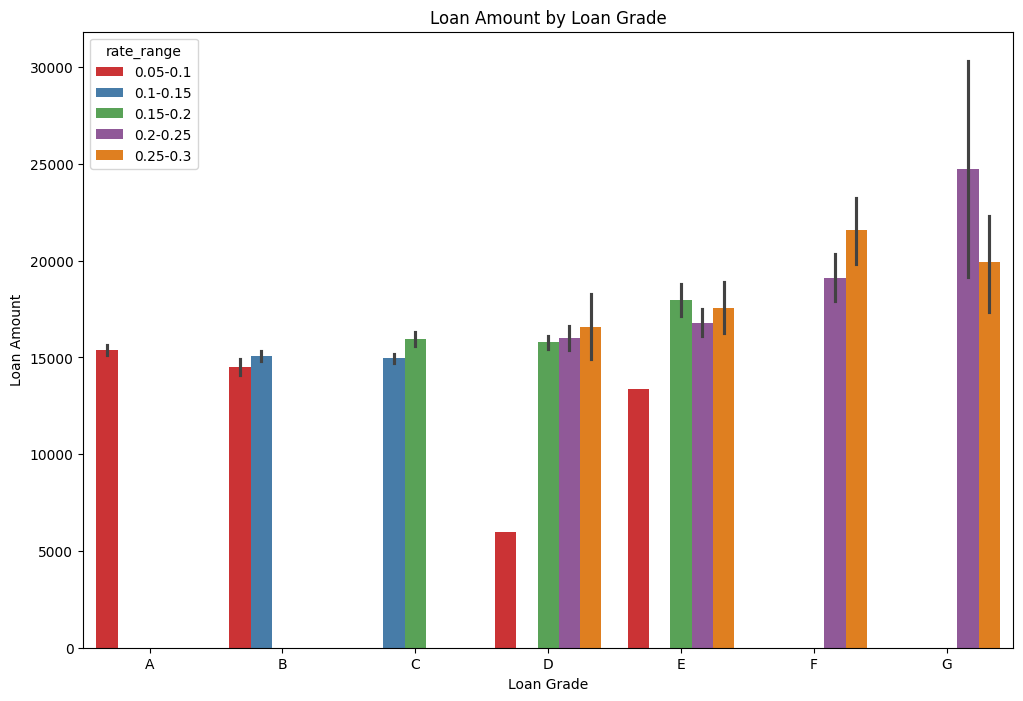

In [12]:
bar_plot_with_hue(x='Grade_Category', y='Loan Amount', data=df,
                  hue='rate_range', title='Loan Amount by Loan Grade',
                  xlabel='Loan Grade', ylabel='Loan Amount')

**lowest interest rate mainly correlated with lower risk grade and vice versa, also high loan amout is contributed with higher risk taken**








**Q2. What is the distribution of loan status by home ownership?**


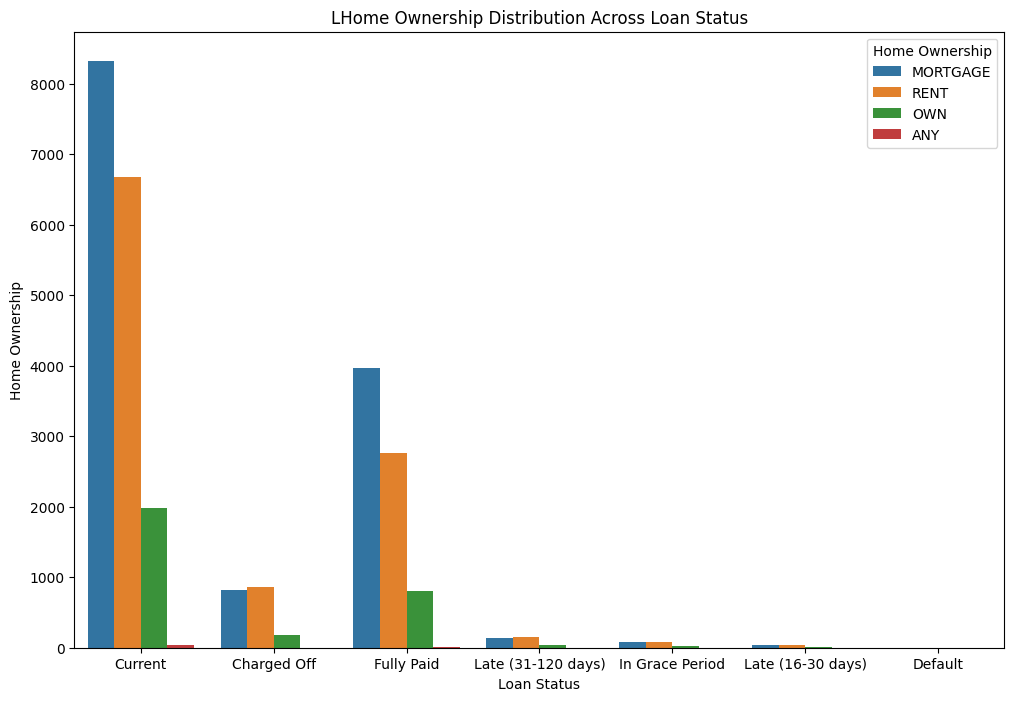

In [13]:
bar_plot(x='Loan Status', y='Home Ownership', data=df,
         title='LHome Ownership Distribution Across Loan Status',
         xlabel='Loan Status', ylabel='Home Ownership')

**Fully paid and current mostly have mortgage type of ownership**

**Q3. Is there a correlation between the borrower’s annual income and the loan amount?**

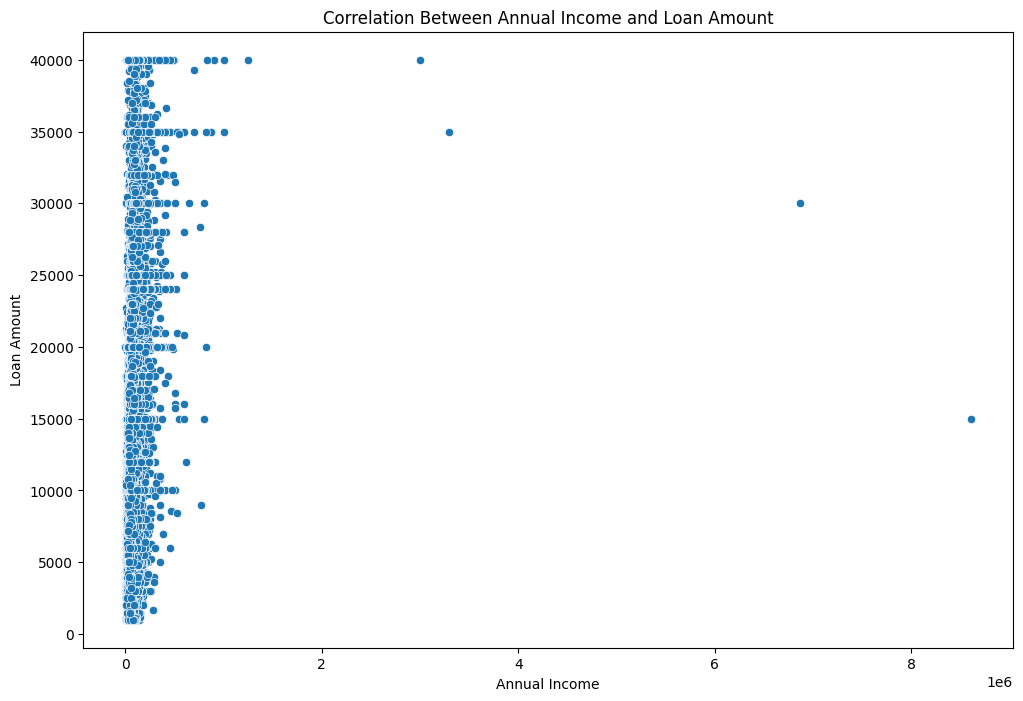

In [14]:
scatter_plot(x='Annual Inc', y='Loan Amount', data=df,
             title='Correlation Between Annual Income and Loan Amount',
             xlabel='Annual Income', ylabel='Loan Amount')

**There is no correlation between them**

**Q4. Does the 'Direct pay' loan type tend to have lower funded amounts compared to other types?**

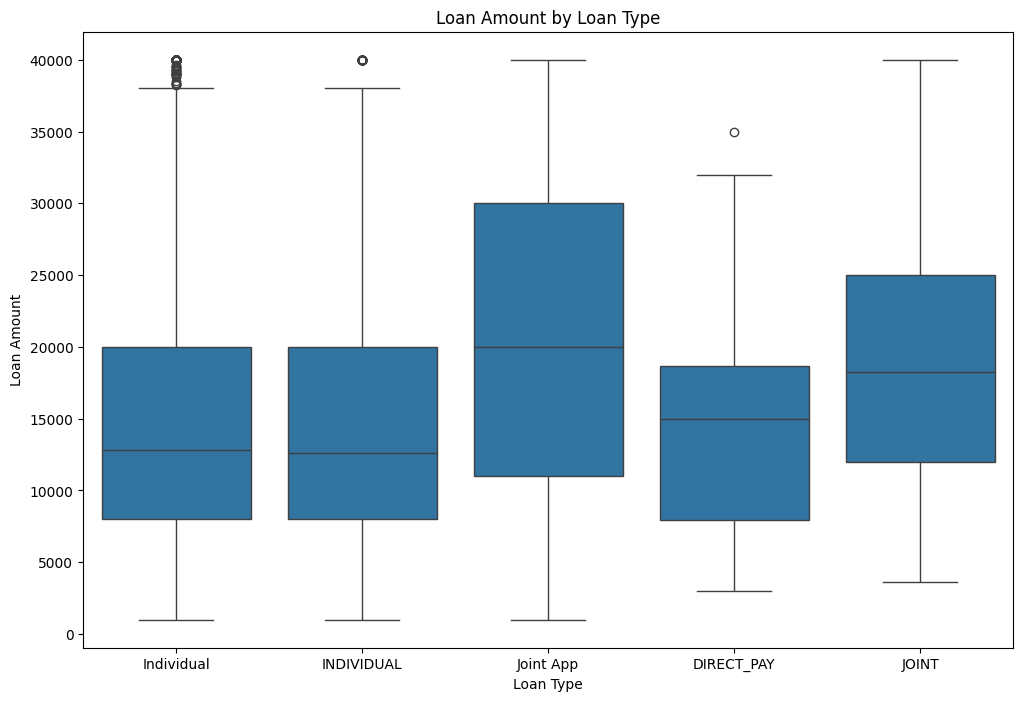

In [15]:
box_plot(x='Type', y='Loan Amount', data=df,
         title="Loan Amount by Loan Type",
         xlabel="Loan Type", ylabel="Loan Amount")

**Yes direct pay has lowest funded amount and joint has the highest**

**Q5. Does a higher interest rate indicate a longer loan term?**

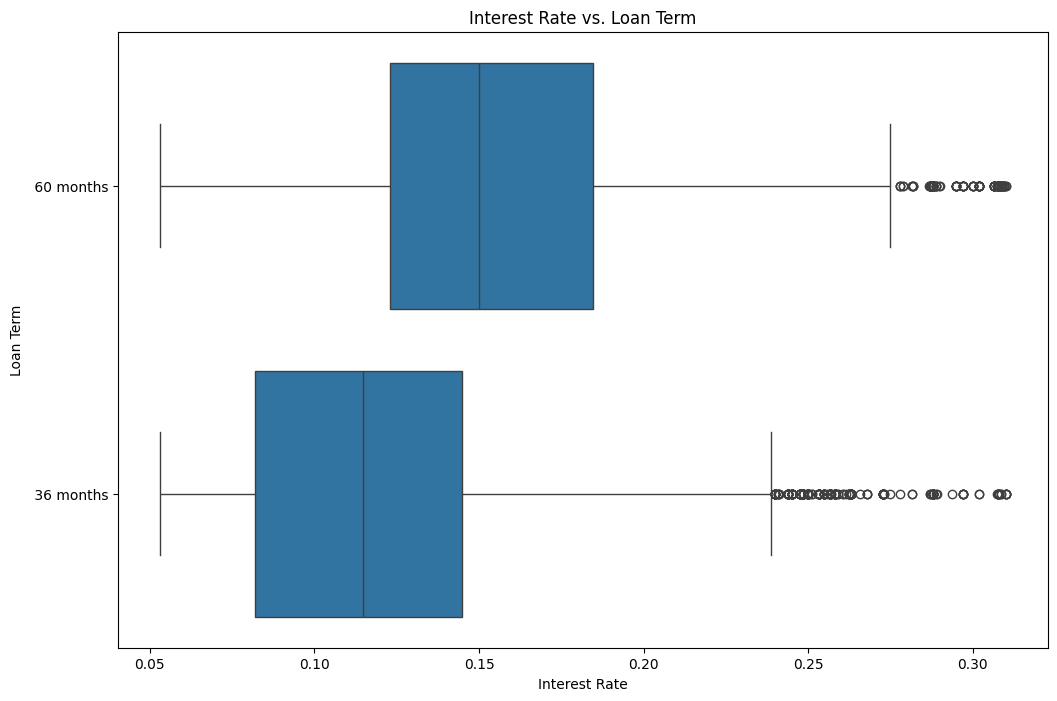

In [16]:
box_plot(x='Int Rate', y='Term', data=df,
             title='Interest Rate vs. Loan Term',
             xlabel='Interest Rate', ylabel='Loan Term')

**Yes it does**

**Q6. Do people with lower employment length and lower income tend to have lower grades (higher risk)?**

<ipython-input-17-6e77fd257e87>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Emp Length Binned'] = pd.cut(df['Emp Length'].replace({'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '10+ years': 10}),


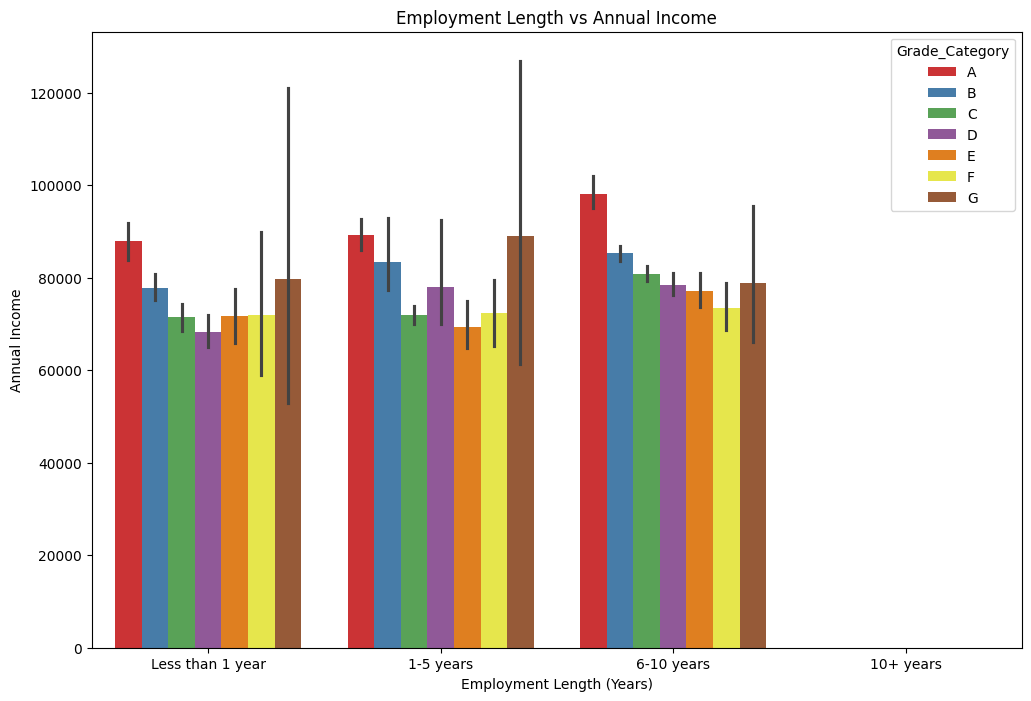

In [17]:
bins = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
labels = ['Less than 1 year', '1-5 years', '6-10 years', '10+ years']

df['Emp Length Binned'] = pd.cut(df['Emp Length'].replace({'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '10+ years': 10}),
bins=[-1, 1, 5, 10, 11], labels=labels)


bar_plot_with_hue(x='Emp Length Binned', y='Annual Inc', data=df,
                      hue='Grade_Category', title='Employment Length vs Annual Income',
                      xlabel='Employment Length (Years)', ylabel='Annual Income')

**no there's no such evidence**

**Q7. Is there a correlation between interest rates and state?**


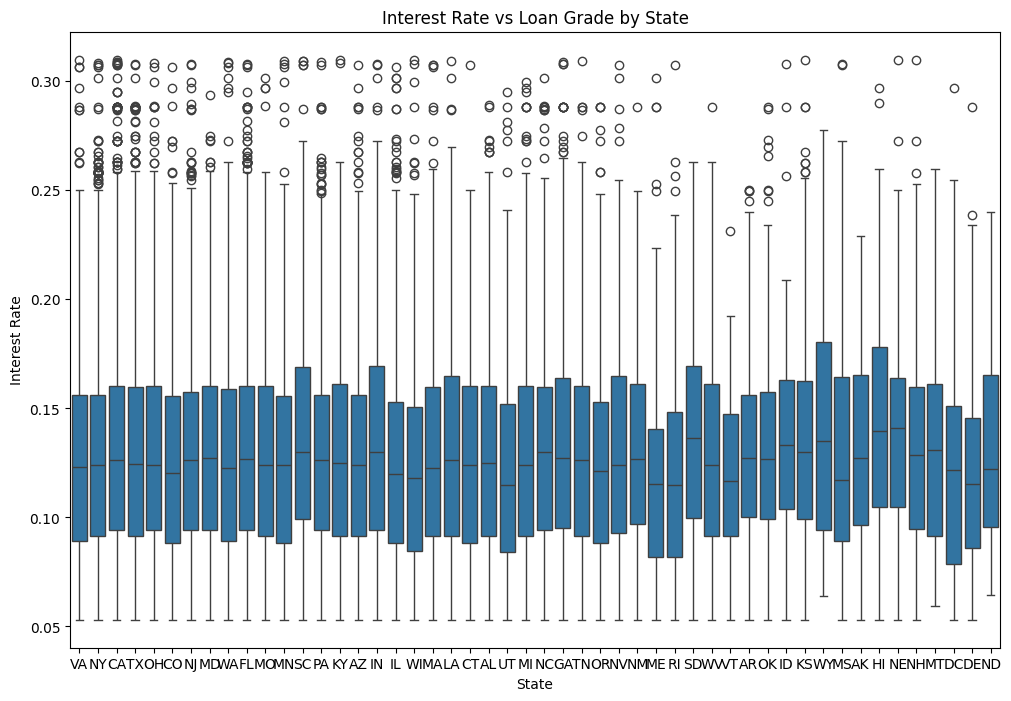

In [18]:
box_plot(x='State', y='Int Rate', data=df,
         title='Interest Rate vs Loan Grade by State',
         xlabel='State', ylabel='Interest Rate')

**No, they are somehow in the same range**


## Data cleaning

In [19]:
def drop_columns(df, columns):
    df.drop(columns, axis=1, inplace=True) #dropping id columns as it doesnot affect my data

In [20]:
def check_isnull(df):
    null_counts = df.isnull().sum().sort_values(ascending=False)
    return null_counts

In [21]:
print(df.shape)
drop_columns(df,'Customer Id') #drop id columns #dropping id columns as it doesnot affect my data
drop_columns(df,'Loan Id')
print(df.shape) #2 columns are removed

(27030, 27)
(27030, 25)


In [22]:
def check_duplicates(df):
  df.duplicated().sum() # no duplicates
  return df
check_duplicates(df)

,Emp Title,Emp Length,Home Ownership,Annual Inc,Annual Inc Joint,Verification Status,Zip Code,Addr State,Avg Cur Bal,Tot Cur Bal,...,Int Rate,Grade,Issue Date,Pymnt Plan,Type,Purpose,Description,Grade_Category,rate_range,Emp Length Binned
0,Truck Driver,< 1 year,MORTGAGE,53360.0,NaN,Verified,242xx,VA,22410.0,224096.0,...,0.2185,17,18 July 2018,False,Individual,debt_consolidation,Debt consolidation,D,0.2-0.25,Less than 1 year
1,NaN,NaN,MORTGAGE,130000.0,NaN,Verified,105xx,NY,33610.0,638583.0,...,0.1147,10,16 May 2016,False,INDIVIDUAL,debt_consolidation,Debt consolidation,B,0.1-0.15,NaN
2,Order processor,4 years,MORTGAGE,28000.0,NaN,Not Verified,932xx,CA,1731.0,8657.0,...,0.1699,20,14 October 2014,False,INDIVIDUAL,credit_card,Credit card refinancing,D,0.15-0.2,1-5 years
3,Senior Auditor,3 years,MORTGAGE,85000.0,NaN,Verified,750xx,TX,33343.0,300083.0,...,0.1602,11,17 December 2017,False,Individual,debt_consolidation,Debt consolidation,C,0.15-0.2,1-5 years
4,Director of Operations,3 years,MORTGAGE,145000.0,NaN,Not Verified,430xx,OH,19640.0,294607.0,...,0.0721,4,18 October 2018,False,Individual,credit_card,Credit card refinancing,A,0.05-0.1,1-5 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27025,CSR,4 years,MORTGAGE,41000.0,NaN,Not Verified,432xx,OH,21748.0,152237.0,...,0.0697,4,16 April 2016,False,INDIVIDUAL,credit_card,Credit card refinancing,A,0.05-0.1,1-5 years
27026,Nurse,2 years,MORTGAGE,39000.0,NaN,Not Verified,448xx,OH,11220.0,201963.0,...,0.2499,30,15 July 2015,False,Individual,credit_card,Credit card refinancing,F,0.2-0.25,1-5 years
27027,counselor,2 years,MORTGAGE,75000.0,NaN,Not Verified,065xx,CT,16474.0,230634.0,...,0.0799,1,16 December 2016,False,INDIVIDUAL,credit_card,Credit card refinancing,A,0.05-0.1,1-5 years
27028,Patient Care Assistant,6 years,OWN,31000.0,NaN,Not Verified,440xx,OH,3415.0,20491.0,...,0.1699,16,15 June 2015,False,Individual,debt_consolidation,Debt consolidation,D,0.15-0.2,6-10 years


In [23]:
df['Type'].value_counts() #inconsistent data should be fixed

,count
Type,
Individual,16994
INDIVIDUAL,8114
Joint App,1802
JOINT,89
DIRECT_PAY,31


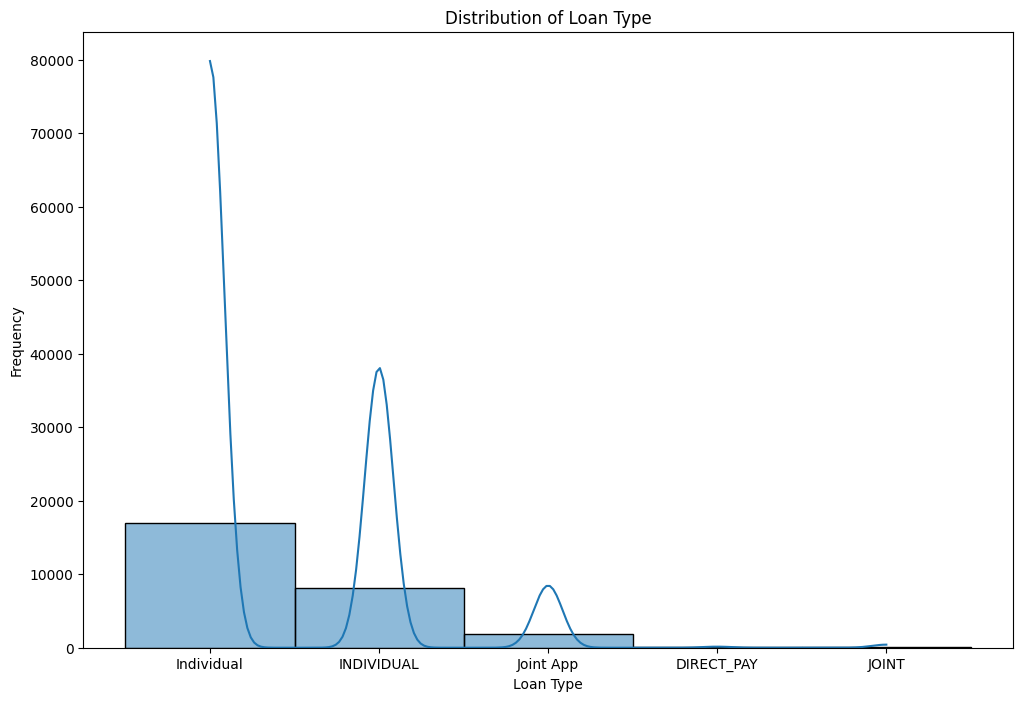

In [24]:
histogram_plot(x='Type', data=df, title='Distribution of Loan Type', xlabel='Loan Type', ylabel='Frequency')

In [25]:
df['Type'] = df['Type'].replace({'INDIVIDUAL': 'Individual', 'Joint App': 'JOINT'}).str.lower() #using replace function to make my data more consistent
df['Type'].value_counts()

,count
Type,
individual,25108
joint,1891
direct_pay,31


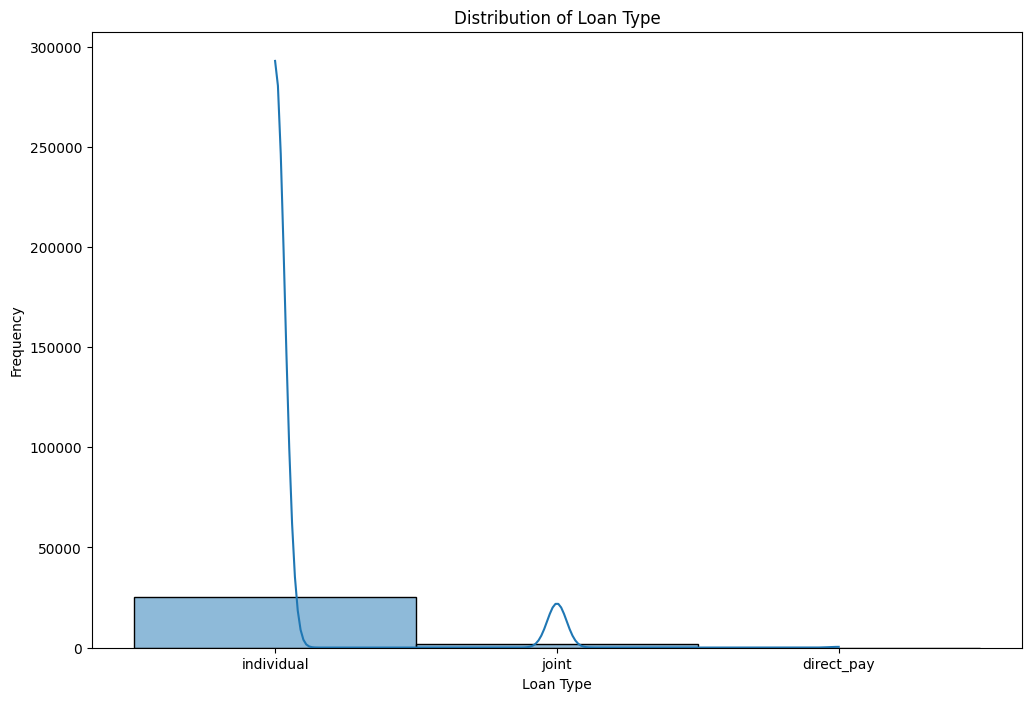

In [26]:
histogram_plot(x='Type', data=df, title='Distribution of Loan Type', xlabel='Loan Type', ylabel='Frequency') #distrbiution of the data set in some values in 'type' has changed

In [27]:
check_isnull(df)

,0
Annual Inc Joint,25139
Emp Title,2320
Emp Length,1849
Emp Length Binned,1849
rate_range,1278
Int Rate,1204
Description,231
Annual Inc,0
Grade_Category,0
Purpose,0


In [28]:
df = df.rename(columns={'Grade': 'letter_grade'})

In [29]:
def clean_data(df, index_col=None):

    df.columns = df.columns.str.replace(' ', '_').str.lower()

    if index_col:
        df.set_index(index_col, inplace=True)

    df.drop_duplicates(inplace=True)
    return df

In [30]:
clean_data(df)

,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,...,int_rate,letter_grade,issue_date,pymnt_plan,type,purpose,description,grade_category,rate_range,emp_length_binned
0,Truck Driver,< 1 year,MORTGAGE,53360.0,NaN,Verified,242xx,VA,22410.0,224096.0,...,0.2185,17,18 July 2018,False,individual,debt_consolidation,Debt consolidation,D,0.2-0.25,Less than 1 year
1,NaN,NaN,MORTGAGE,130000.0,NaN,Verified,105xx,NY,33610.0,638583.0,...,0.1147,10,16 May 2016,False,individual,debt_consolidation,Debt consolidation,B,0.1-0.15,NaN
2,Order processor,4 years,MORTGAGE,28000.0,NaN,Not Verified,932xx,CA,1731.0,8657.0,...,0.1699,20,14 October 2014,False,individual,credit_card,Credit card refinancing,D,0.15-0.2,1-5 years
3,Senior Auditor,3 years,MORTGAGE,85000.0,NaN,Verified,750xx,TX,33343.0,300083.0,...,0.1602,11,17 December 2017,False,individual,debt_consolidation,Debt consolidation,C,0.15-0.2,1-5 years
4,Director of Operations,3 years,MORTGAGE,145000.0,NaN,Not Verified,430xx,OH,19640.0,294607.0,...,0.0721,4,18 October 2018,False,individual,credit_card,Credit card refinancing,A,0.05-0.1,1-5 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27025,CSR,4 years,MORTGAGE,41000.0,NaN,Not Verified,432xx,OH,21748.0,152237.0,...,0.0697,4,16 April 2016,False,individual,credit_card,Credit card refinancing,A,0.05-0.1,1-5 years
27026,Nurse,2 years,MORTGAGE,39000.0,NaN,Not Verified,448xx,OH,11220.0,201963.0,...,0.2499,30,15 July 2015,False,individual,credit_card,Credit card refinancing,F,0.2-0.25,1-5 years
27027,counselor,2 years,MORTGAGE,75000.0,NaN,Not Verified,065xx,CT,16474.0,230634.0,...,0.0799,1,16 December 2016,False,individual,credit_card,Credit card refinancing,A,0.05-0.1,1-5 years
27028,Patient Care Assistant,6 years,OWN,31000.0,NaN,Not Verified,440xx,OH,3415.0,20491.0,...,0.1699,16,15 June 2015,False,individual,debt_consolidation,Debt consolidation,D,0.15-0.2,6-10 years


In [31]:
print(df.shape)
drop_columns(df, ['rate_range', 'emp_length_binned','grade_category']) #dropping ranges made for visualizations not in the dataset to better focus on original null values
print(df.shape) # 3 columns are removed

(27030, 25)
(27030, 22)


In [32]:
cleaned_df= clean_data(df).copy()

In [33]:
check_isnull(cleaned_df)/cleaned_df.shape[0]

,0
annual_inc_joint,0.930041
emp_title,0.085831
emp_length,0.068405
int_rate,0.044543
description,0.008546
verification_status,0.000000
term,0.000000
purpose,0.000000
type,0.000000
pymnt_plan,0.000000


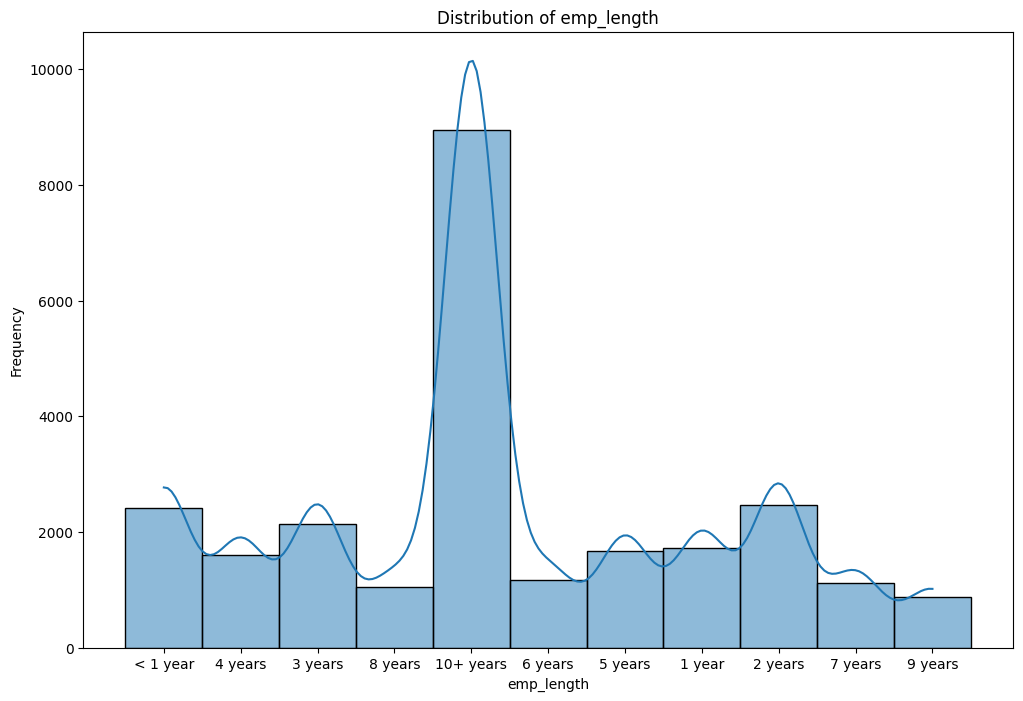

In [34]:
histogram_plot(x='emp_length', data=cleaned_df, title='Distribution of emp_length', xlabel='emp_length', ylabel='Frequency') #before making data values consistent in emp_length

In [35]:
# convert emp_length to numerical as it should
print(cleaned_df)
cleaned_df['emp_length'] = cleaned_df['emp_length'].str.extract('(\d+)').fillna(-1).astype(int) #using extract method to ensure emp length has numerical data and remove expressions
cleaned_df['emp_length'].value_counts()
print(cleaned_df) #no changes to the data

                    emp_title emp_length home_ownership  annual_inc  \
0               Truck Driver    < 1 year       MORTGAGE     53360.0   
1                         NaN        NaN       MORTGAGE    130000.0   
2            Order processor     4 years       MORTGAGE     28000.0   
3              Senior Auditor    3 years       MORTGAGE     85000.0   
4      Director of Operations    3 years       MORTGAGE    145000.0   
...                       ...        ...            ...         ...   
27025                     CSR    4 years       MORTGAGE     41000.0   
27026                   Nurse    2 years       MORTGAGE     39000.0   
27027               counselor    2 years       MORTGAGE     75000.0   
27028  Patient Care Assistant    6 years            OWN     31000.0   
27029  Treasury Administrator  10+ years           RENT     62000.0   

       annual_inc_joint verification_status zip_code addr_state  avg_cur_bal  \
0                   NaN            Verified    242xx         VA    

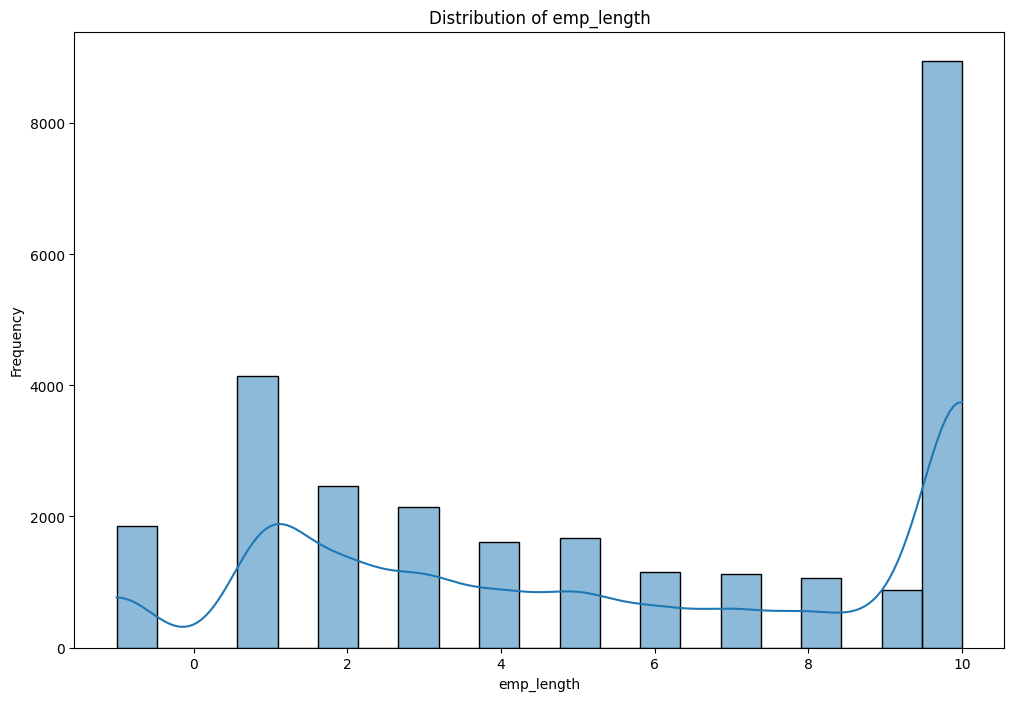

In [36]:
histogram_plot(x='emp_length', data=cleaned_df, title='Distribution of emp_length', xlabel='emp_length', ylabel='Frequency') #distribution of data in emp_length has changed

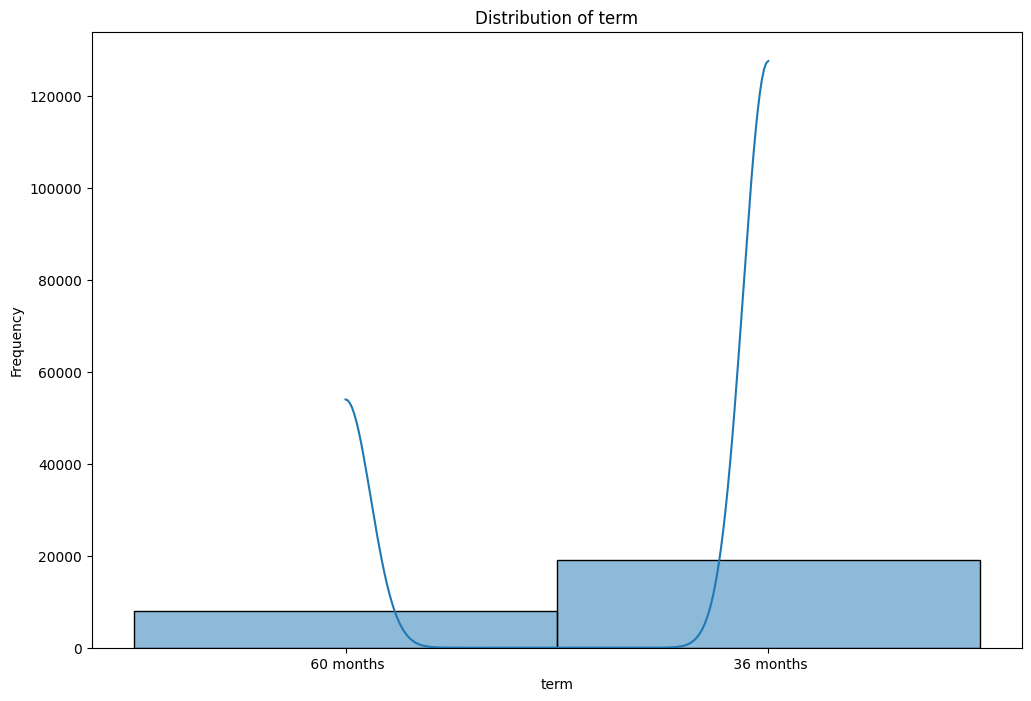

In [37]:
histogram_plot(x='term', data=cleaned_df, title='Distribution of term', xlabel='term', ylabel='Frequency') #distribution of term before making its value numerical

In [38]:
# convert term to numerical as it should
print(cleaned_df)
cleaned_df['term'] = cleaned_df['term'].str.extract('(\d+)').astype(int) #using extract method to ensure term has numerical data and remove expression
cleaned_df['term'].value_counts()
print(cleaned_df) #no changes to the data

                    emp_title  emp_length home_ownership  annual_inc  \
0               Truck Driver            1       MORTGAGE     53360.0   
1                         NaN          -1       MORTGAGE    130000.0   
2            Order processor            4       MORTGAGE     28000.0   
3              Senior Auditor           3       MORTGAGE     85000.0   
4      Director of Operations           3       MORTGAGE    145000.0   
...                       ...         ...            ...         ...   
27025                     CSR           4       MORTGAGE     41000.0   
27026                   Nurse           2       MORTGAGE     39000.0   
27027               counselor           2       MORTGAGE     75000.0   
27028  Patient Care Assistant           6            OWN     31000.0   
27029  Treasury Administrator          10           RENT     62000.0   

       annual_inc_joint verification_status zip_code addr_state  avg_cur_bal  \
0                   NaN            Verified    242xx   

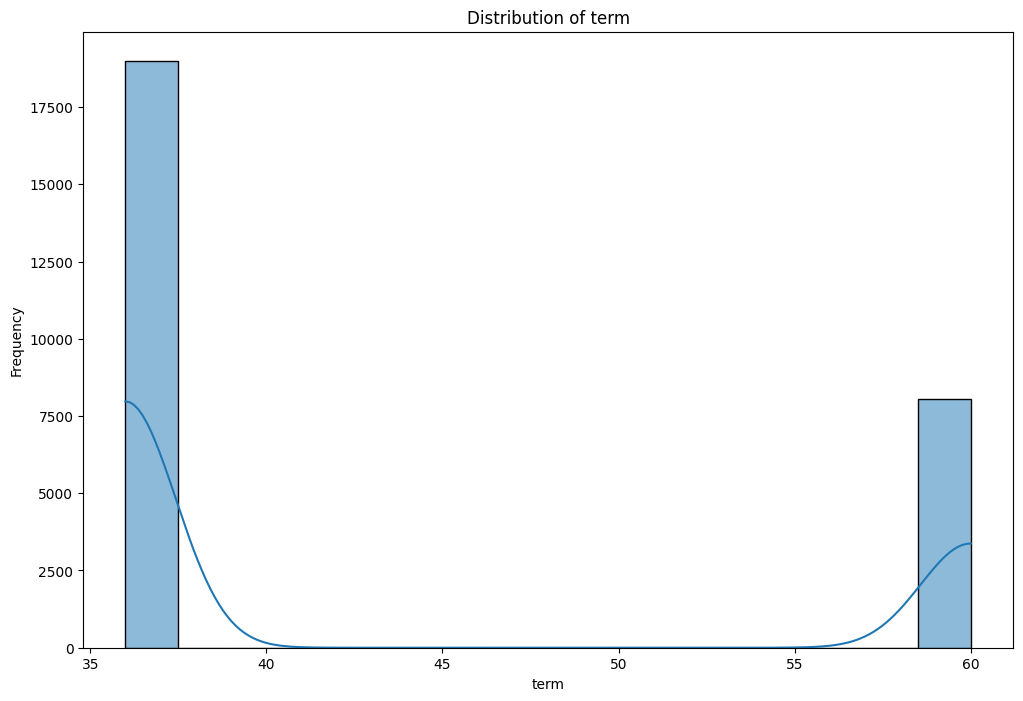

In [39]:
histogram_plot(x='term', data=cleaned_df, title='Distribution of term', xlabel='term', ylabel='Frequency') #distribution has changed here

In [40]:
cleaned_df[cleaned_df['annual_inc_joint'].isna() & cleaned_df['annual_inc'].notna()].index

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       27020, 27021, 27022, 27023, 27024, 27025, 27026, 27027, 27028, 27029],
      dtype='int64', length=25139)

In [41]:
cleaned_df['annual_inc_joint']

,annual_inc_joint
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
27025,NaN
27026,NaN
27027,NaN
27028,NaN


In [42]:
def impute_nonExistant(col,cleaned_df):
    cleaned_df[col].fillna('non_existant', inplace=True)
    return cleaned_df

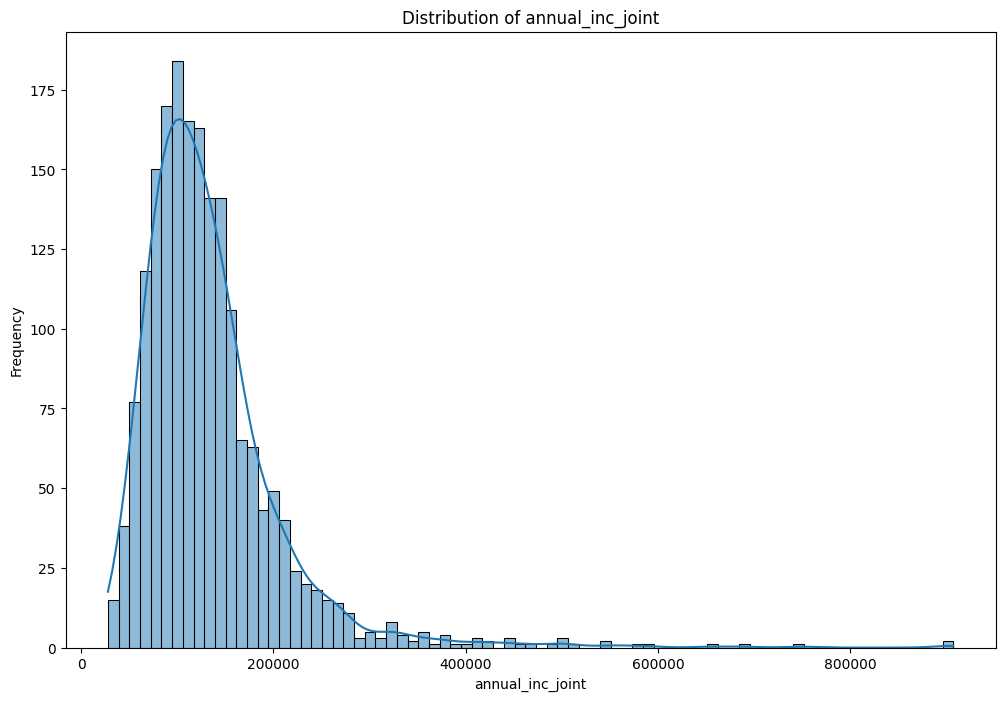

In [43]:
histogram_plot(x='annual_inc_joint', data=cleaned_df, title='Distribution of annual_inc_joint', xlabel='annual_inc_joint', ylabel='Frequency')

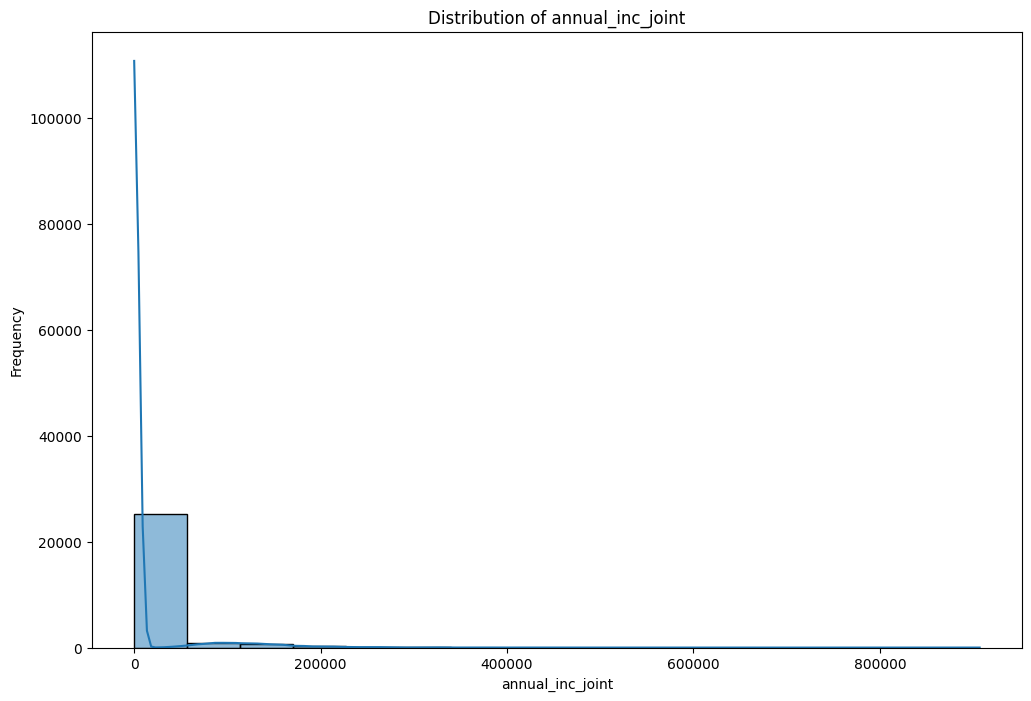

In [44]:
cleaned_df['annual_inc_joint'] = cleaned_df['annual_inc_joint'].fillna(-1) #chose -1 as nonexistant as its a numerical variable

histogram_plot(x='annual_inc_joint', data=cleaned_df, title='Distribution of annual_inc_joint', xlabel='annual_inc_joint', ylabel='Frequency') #it changed the distribution

**The number of occurrences where annual_inc has values corresponding to annual_inc_joint being NaN is 25,139. This suggests that the annual_inc values are valid, while the annual_inc_joint values are missing (Not existant). These instances are important to retain, as they indicate a low or nonexistent joint annual income compared to the individual income.**

In [45]:
def check_missing_values(df, col1, col2):
    return df[col1].isnull().groupby(df[col2]).mean()

In [46]:
check_missing_values(cleaned_df,'description' ,'purpose')

,description
purpose,
car,0.000000
credit_card,0.008172
debt_consolidation,0.009154
home_improvement,0.008489
house,0.010526
major_purchase,0.010695
medical,0.008621
moving,0.010695
other,0.004957


**The missing values in the description column do not show any clear pattern with the purpose column and account for only 0.008% of the data, which suggests that the missingness can be classified as MCAR (Missing Completely At Random).**

In [47]:
from scipy.stats import chi2_contingency

def check_categorical_correlation(data, var1, var2):

    contingency_table = pd.crosstab(data[var1], data[var2])

    # Perform Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Calculate Cramér's V
    n = contingency_table.sum().sum()  # Total number of observations
    k = min(contingency_table.shape)   # Number of categories (rows or columns)
    cramers_v = np.sqrt(chi2 / (n * (k - 1)))

    # Print Results
    print(f"Chi-Square Statistic (χ²): {chi2:.4f}")
    print(f"P-Value: {p:.4f}")
    print(f"Degrees of Freedom: {dof}")
    print(f"Cramér's V: {cramers_v:.4f}")

    # Interpretation based on p-value
    if p < 0.05:
        print("\nThe variables are significantly correlated (association exists).")
    else:
        print("\nThe variables are NOT significantly correlated (no association).")
check_categorical_correlation(cleaned_df, 'purpose', 'description')

Chi-Square Statistic (χ²): 313768.5957
P-Value: 0.0000
Degrees of Freedom: 9864
Cramér's V: 0.9878

The variables are significantly correlated (association exists).


**based on chi x2 measures description and purpose are highly correlated**

In [48]:
cleaned_df['purpose'].isnull().sum() #since purpose has no missing values we can impute data from it

0

In [49]:
def impute_multivariant_mode(col1,col2,cleaned_df):
    cleaned_df[col1].fillna(cleaned_df.groupby(col2)[col1].transform(lambda x: x.mode()[0]), inplace=True)
    return cleaned_df
def impute_multivariant_mean(col1, col2, cleaned_df):
    cleaned_df[col1].fillna(cleaned_df.groupby(col2)[col1].transform('mean'), inplace=True) #Change is here
    return cleaned_df

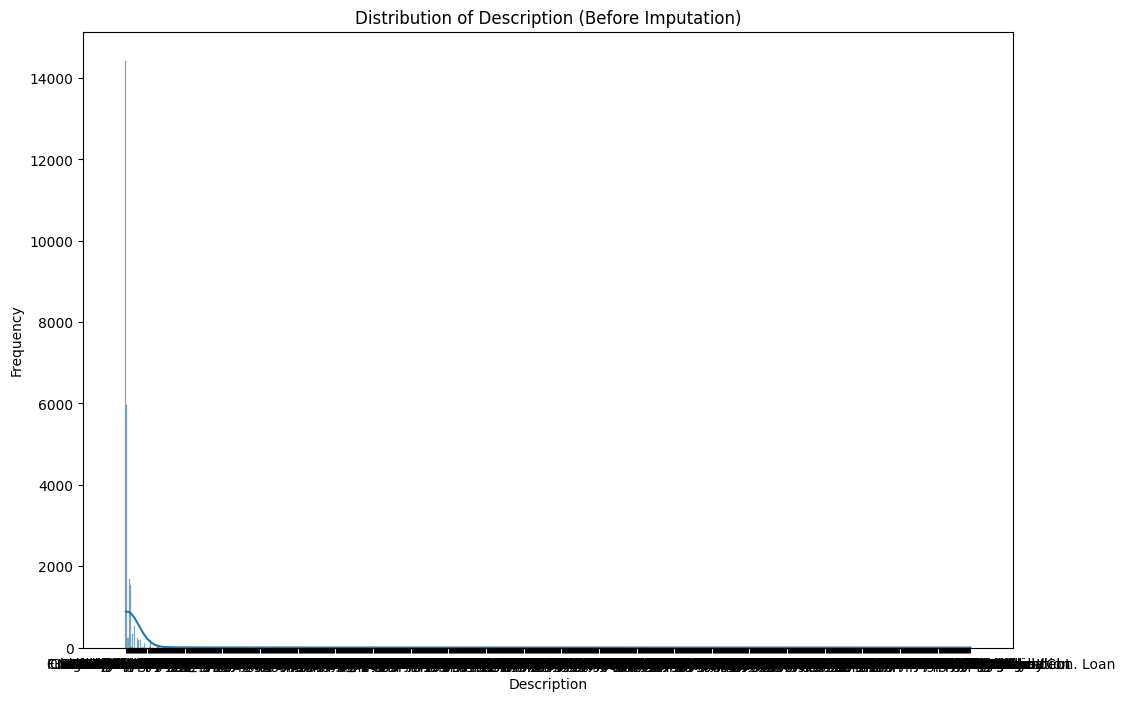

In [50]:
histplot(x='description', data=cleaned_df, title='Distribution of Description (Before Imputation)', xlabel='Description', ylabel='Frequency') #distribution of description before imputing

In [51]:
impute_multivariant_mode('description','purpose',cleaned_df) #using mode because they are both categorical data

<ipython-input-49-37c7d69b1412>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_df[col1].fillna(cleaned_df.groupby(col2)[col1].transform(lambda x: x.mode()[0]), inplace=True)


,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,...,state,funded_amount,term,int_rate,letter_grade,issue_date,pymnt_plan,type,purpose,description
0,Truck Driver,1,MORTGAGE,53360.0,-1.0,Verified,242xx,VA,22410.0,224096.0,...,VA,30000.0,60,0.2185,17,18 July 2018,False,individual,debt_consolidation,Debt consolidation
1,NaN,-1,MORTGAGE,130000.0,-1.0,Verified,105xx,NY,33610.0,638583.0,...,NY,35000.0,36,0.1147,10,16 May 2016,False,individual,debt_consolidation,Debt consolidation
2,Order processor,4,MORTGAGE,28000.0,-1.0,Not Verified,932xx,CA,1731.0,8657.0,...,CA,10050.0,36,0.1699,20,14 October 2014,False,individual,credit_card,Credit card refinancing
3,Senior Auditor,3,MORTGAGE,85000.0,-1.0,Verified,750xx,TX,33343.0,300083.0,...,TX,21500.0,60,0.1602,11,17 December 2017,False,individual,debt_consolidation,Debt consolidation
4,Director of Operations,3,MORTGAGE,145000.0,-1.0,Not Verified,430xx,OH,19640.0,294607.0,...,OH,4800.0,36,0.0721,4,18 October 2018,False,individual,credit_card,Credit card refinancing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27025,CSR,4,MORTGAGE,41000.0,-1.0,Not Verified,432xx,OH,21748.0,152237.0,...,OH,7600.0,36,0.0697,4,16 April 2016,False,individual,credit_card,Credit card refinancing
27026,Nurse,2,MORTGAGE,39000.0,-1.0,Not Verified,448xx,OH,11220.0,201963.0,...,OH,12475.0,60,0.2499,30,15 July 2015,False,individual,credit_card,Credit card refinancing
27027,counselor,2,MORTGAGE,75000.0,-1.0,Not Verified,065xx,CT,16474.0,230634.0,...,CT,24000.0,36,0.0799,1,16 December 2016,False,individual,credit_card,Credit card refinancing
27028,Patient Care Assistant,6,OWN,31000.0,-1.0,Not Verified,440xx,OH,3415.0,20491.0,...,OH,7175.0,36,0.1699,16,15 June 2015,False,individual,debt_consolidation,Debt consolidation


**Since purpose and description are correlated, and purpose has no missing values, we can impute the missing values in the description column by using the mode of description within each purpose group. Also description has very low missing values which can be considered MCAR**

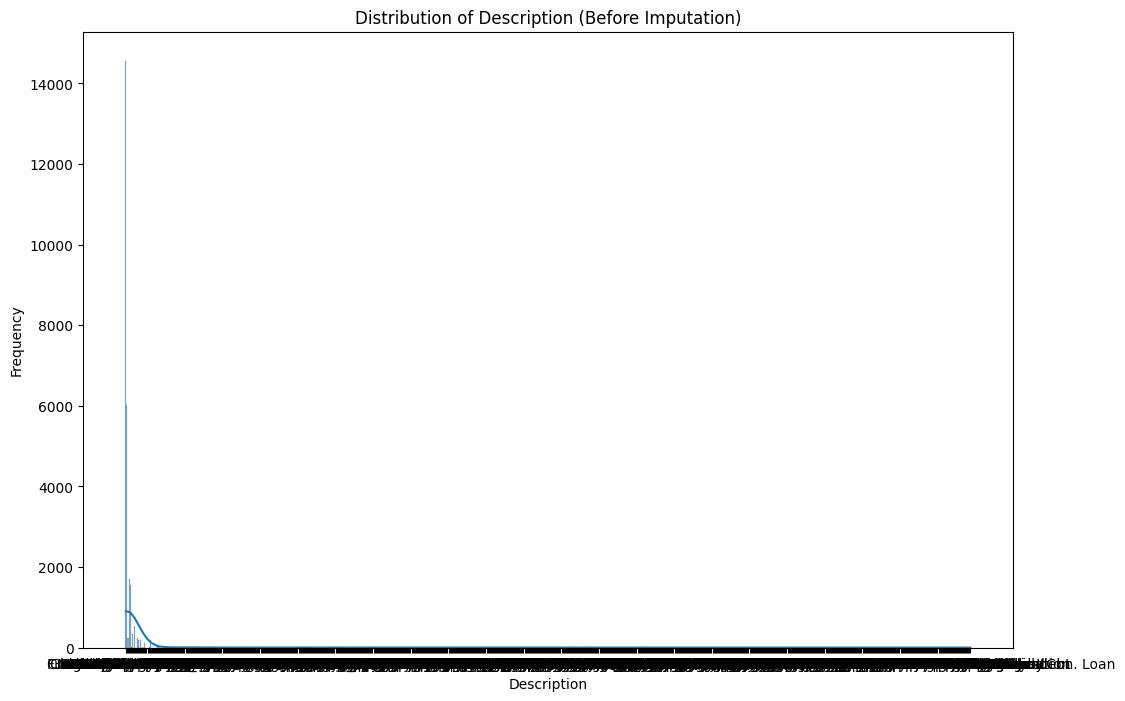

In [52]:
histplot(x='description', data=cleaned_df, title='Distribution of Description (Before Imputation)', xlabel='Description', ylabel='Frequency') #it seems that there is no change before and after imputing description in the dataset

In [53]:
check_isnull(cleaned_df)

,0
emp_title,2320
int_rate,1204
emp_length,0
purpose,0
type,0
pymnt_plan,0
issue_date,0
letter_grade,0
term,0
funded_amount,0


In [54]:
def check_numerical_correlation(col1, col2, df):
    correlation = df[col1].corr(df[col2])
    return correlation

In [55]:
check_missing_values(cleaned_df,'int_rate' ,'term') #there is no pattern here

,int_rate
term,
36,0.044124
60,0.045534


In [56]:
check_missing_values(cleaned_df,'int_rate' ,'loan_status') #here default payment has no missing rate values however cant say it has a pattern

,int_rate
loan_status,
Charged Off,0.058258
Current,0.044165
Default,0.000000
Fully Paid,0.041733
In Grace Period,0.061798
Late (16-30 days),0.048780
Late (31-120 days),0.040248


In [57]:
check_missing_values(cleaned_df,'int_rate' ,'home_ownership') #there is no pattern here

,int_rate
home_ownership,
ANY,0.047619
MORTGAGE,0.037566
OWN,0.040341
RENT,0.054557


In [58]:
check_missing_values(cleaned_df,'int_rate' ,'state') # there is pattern here were int rate only missing in NA, CA , TX

,int_rate
state,
AK,0.000000
AL,0.000000
AR,0.000000
AZ,0.000000
CA,0.153655
CO,0.000000
CT,0.000000
DC,0.000000
DE,0.000000


**California (CA), New York (NY), and Texas (TX) are the only states with a missing range of interest rate data, it could indicate a potential data pattern or issue that warrants investigation. so it is considered to be MAR as we can find explaination based on other variable**

In [59]:
check_numerical_correlation('letter_grade','int_rate',cleaned_df)

0.9210425604976519

**Since grade and int_rate are highly correlated, we will impute the missing values in int_rate using the mean int_rate within each grade group.**

In [60]:
check_missing_values(cleaned_df,'int_rate' ,'letter_grade')

,int_rate
letter_grade,
1,0.038103
2,0.043890
3,0.040732
4,0.047788
5,0.040033
6,0.046875
7,0.045425
8,0.044316
9,0.049191


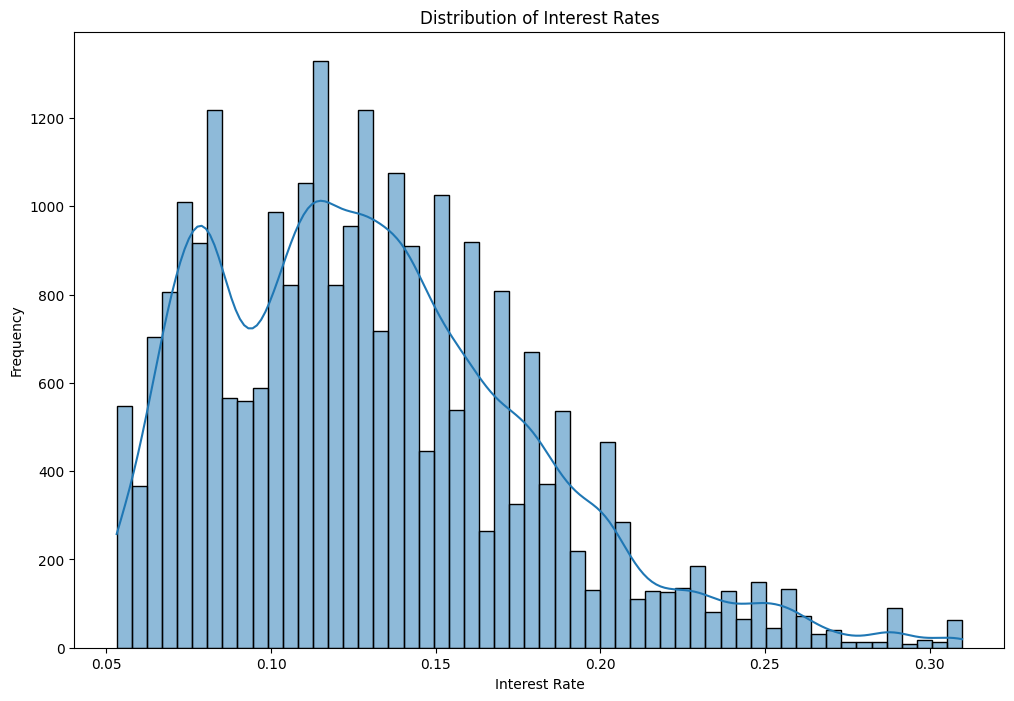

In [61]:
histplot('int_rate', cleaned_df, 'Distribution of Interest Rates', 'Interest Rate', 'Frequency') #check distribution before imputing by mean

In [62]:
impute_multivariant_mean('int_rate','letter_grade',cleaned_df)

<ipython-input-49-37c7d69b1412>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_df[col1].fillna(cleaned_df.groupby(col2)[col1].transform('mean'), inplace=True) #Change is here


,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,...,state,funded_amount,term,int_rate,letter_grade,issue_date,pymnt_plan,type,purpose,description
0,Truck Driver,1,MORTGAGE,53360.0,-1.0,Verified,242xx,VA,22410.0,224096.0,...,VA,30000.0,60,0.2185,17,18 July 2018,False,individual,debt_consolidation,Debt consolidation
1,NaN,-1,MORTGAGE,130000.0,-1.0,Verified,105xx,NY,33610.0,638583.0,...,NY,35000.0,36,0.1147,10,16 May 2016,False,individual,debt_consolidation,Debt consolidation
2,Order processor,4,MORTGAGE,28000.0,-1.0,Not Verified,932xx,CA,1731.0,8657.0,...,CA,10050.0,36,0.1699,20,14 October 2014,False,individual,credit_card,Credit card refinancing
3,Senior Auditor,3,MORTGAGE,85000.0,-1.0,Verified,750xx,TX,33343.0,300083.0,...,TX,21500.0,60,0.1602,11,17 December 2017,False,individual,debt_consolidation,Debt consolidation
4,Director of Operations,3,MORTGAGE,145000.0,-1.0,Not Verified,430xx,OH,19640.0,294607.0,...,OH,4800.0,36,0.0721,4,18 October 2018,False,individual,credit_card,Credit card refinancing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27025,CSR,4,MORTGAGE,41000.0,-1.0,Not Verified,432xx,OH,21748.0,152237.0,...,OH,7600.0,36,0.0697,4,16 April 2016,False,individual,credit_card,Credit card refinancing
27026,Nurse,2,MORTGAGE,39000.0,-1.0,Not Verified,448xx,OH,11220.0,201963.0,...,OH,12475.0,60,0.2499,30,15 July 2015,False,individual,credit_card,Credit card refinancing
27027,counselor,2,MORTGAGE,75000.0,-1.0,Not Verified,065xx,CT,16474.0,230634.0,...,CT,24000.0,36,0.0799,1,16 December 2016,False,individual,credit_card,Credit card refinancing
27028,Patient Care Assistant,6,OWN,31000.0,-1.0,Not Verified,440xx,OH,3415.0,20491.0,...,OH,7175.0,36,0.1699,16,15 June 2015,False,individual,debt_consolidation,Debt consolidation


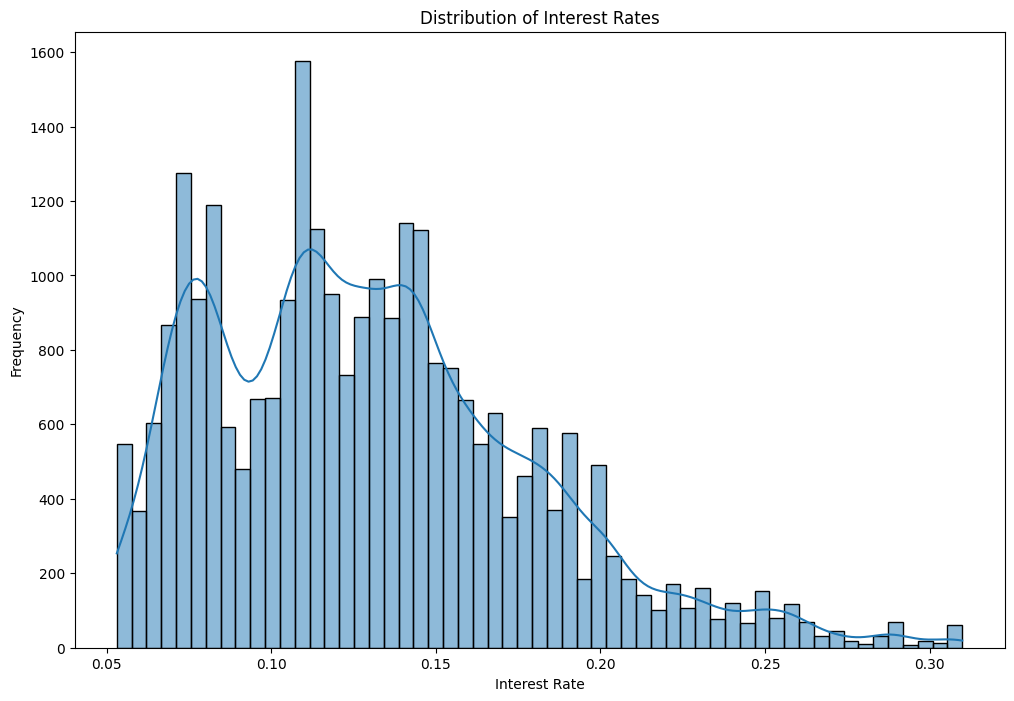

In [63]:
histplot('int_rate', cleaned_df, 'Distribution of Interest Rates', 'Interest Rate', 'Frequency') #there is no such great difference so will keep it as it is

In [64]:
check_isnull(cleaned_df)

,0
emp_title,2320
emp_length,0
purpose,0
type,0
pymnt_plan,0
issue_date,0
letter_grade,0
int_rate,0
term,0
funded_amount,0


In [65]:
check_missing_values(cleaned_df,'emp_title' ,'addr_state') #there is no pattern here

,emp_title
addr_state,
AK,0.041096
AL,0.106195
AR,0.101010
AZ,0.092357
CA,0.082483
CO,0.067019
CT,0.084233
DC,0.125000
DE,0.080000


In [66]:
check_missing_values(cleaned_df,'emp_length' ,'type') #there is no pattern here

,emp_length
type,
direct_pay,0.0
individual,0.0
joint,0.0


In [67]:
check_missing_values(cleaned_df,'emp_length' ,'emp_title') #there is no pattern here

,emp_length
emp_title,
Color technician,0.0
Assistant Manager,0.0
Associate Director Portfolio Management,0.0
Bus operation,0.0
CDL Driver,0.0
...,...
"writer/editor, account manager",0.0
x-ray technologist,0.0
xray tech,0.0


In [68]:
check_missing_values(cleaned_df,'emp_title' ,'emp_length') #there is no pattern here

,emp_title
emp_length,
-1,0.995673
1,0.093282
2,0.003656
3,0.005128
4,0.003741
5,0.005402
6,0.007759
7,0.006233
8,0.000948


In [69]:
def impute_nan(col, df):
  col.fillna(np.nan, inplace=True)
  return df

In [70]:
impute_nan(cleaned_df['emp_title'], cleaned_df)

,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,...,state,funded_amount,term,int_rate,letter_grade,issue_date,pymnt_plan,type,purpose,description
0,Truck Driver,1,MORTGAGE,53360.0,-1.0,Verified,242xx,VA,22410.0,224096.0,...,VA,30000.0,60,0.2185,17,18 July 2018,False,individual,debt_consolidation,Debt consolidation
1,NaN,-1,MORTGAGE,130000.0,-1.0,Verified,105xx,NY,33610.0,638583.0,...,NY,35000.0,36,0.1147,10,16 May 2016,False,individual,debt_consolidation,Debt consolidation
2,Order processor,4,MORTGAGE,28000.0,-1.0,Not Verified,932xx,CA,1731.0,8657.0,...,CA,10050.0,36,0.1699,20,14 October 2014,False,individual,credit_card,Credit card refinancing
3,Senior Auditor,3,MORTGAGE,85000.0,-1.0,Verified,750xx,TX,33343.0,300083.0,...,TX,21500.0,60,0.1602,11,17 December 2017,False,individual,debt_consolidation,Debt consolidation
4,Director of Operations,3,MORTGAGE,145000.0,-1.0,Not Verified,430xx,OH,19640.0,294607.0,...,OH,4800.0,36,0.0721,4,18 October 2018,False,individual,credit_card,Credit card refinancing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27025,CSR,4,MORTGAGE,41000.0,-1.0,Not Verified,432xx,OH,21748.0,152237.0,...,OH,7600.0,36,0.0697,4,16 April 2016,False,individual,credit_card,Credit card refinancing
27026,Nurse,2,MORTGAGE,39000.0,-1.0,Not Verified,448xx,OH,11220.0,201963.0,...,OH,12475.0,60,0.2499,30,15 July 2015,False,individual,credit_card,Credit card refinancing
27027,counselor,2,MORTGAGE,75000.0,-1.0,Not Verified,065xx,CT,16474.0,230634.0,...,CT,24000.0,36,0.0799,1,16 December 2016,False,individual,credit_card,Credit card refinancing
27028,Patient Care Assistant,6,OWN,31000.0,-1.0,Not Verified,440xx,OH,3415.0,20491.0,...,OH,7175.0,36,0.1699,16,15 June 2015,False,individual,debt_consolidation,Debt consolidation


Logically, it makes sense that missing values in emp_length (employment length) are linked to missing values in emp_title (job title). After all, if the job title is unknown, it becomes difficult to determine how long someone has been employed. In the data, there are 2,320 missing values for emp_title and 1,849 missing values for emp_length.

However, upon analyzing the data, I couldn’t identify a clear pattern or relationship to explain why these values are missing. As a result, the missing data is assumed to be Missing Not At Random (MNAR) so it is better to keep it value np.nan as it means something

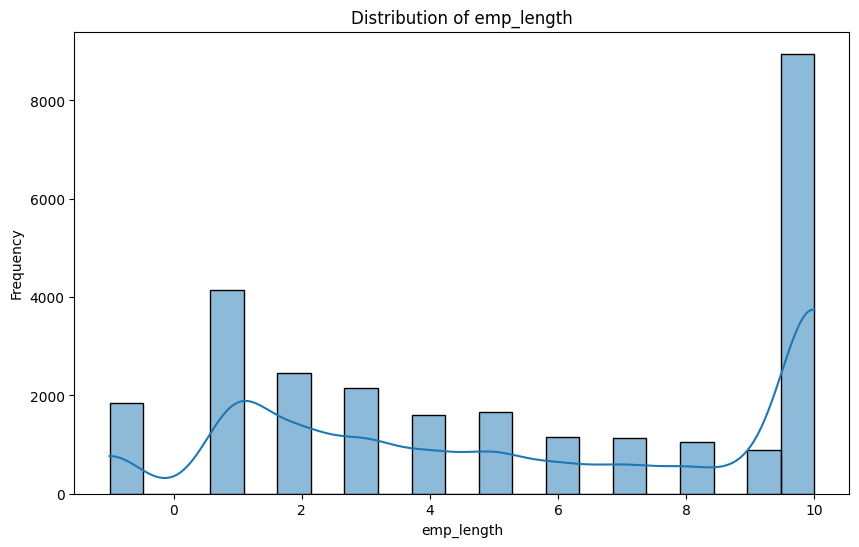

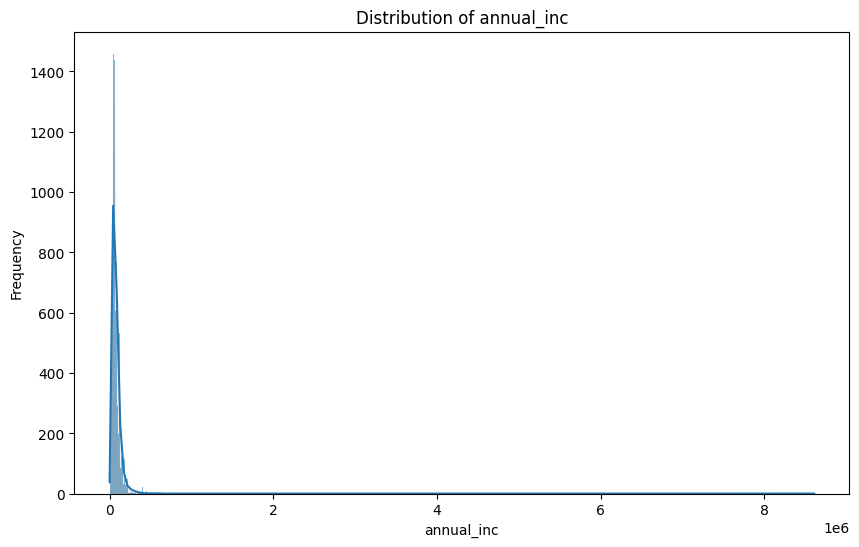

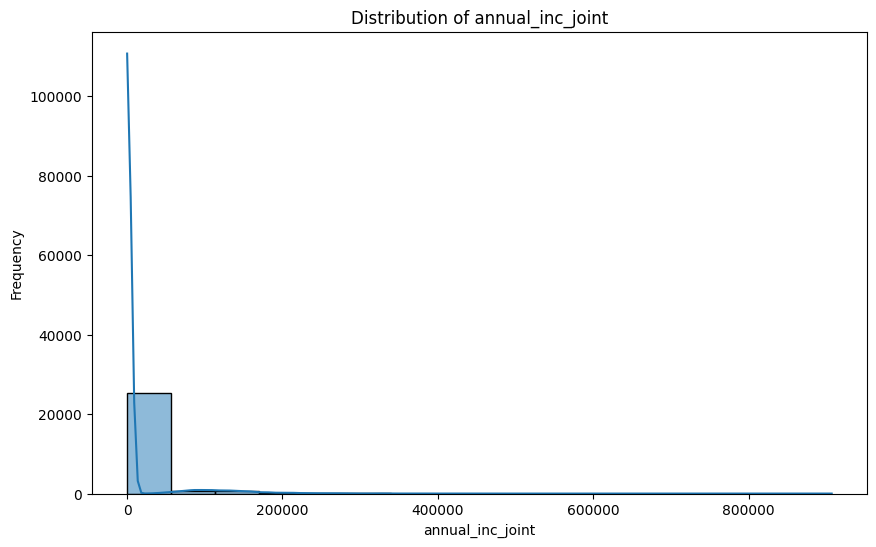

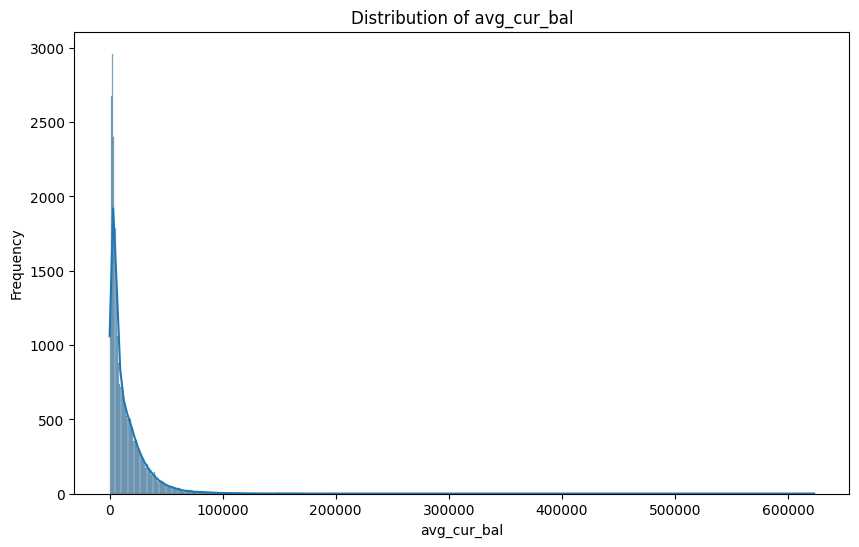

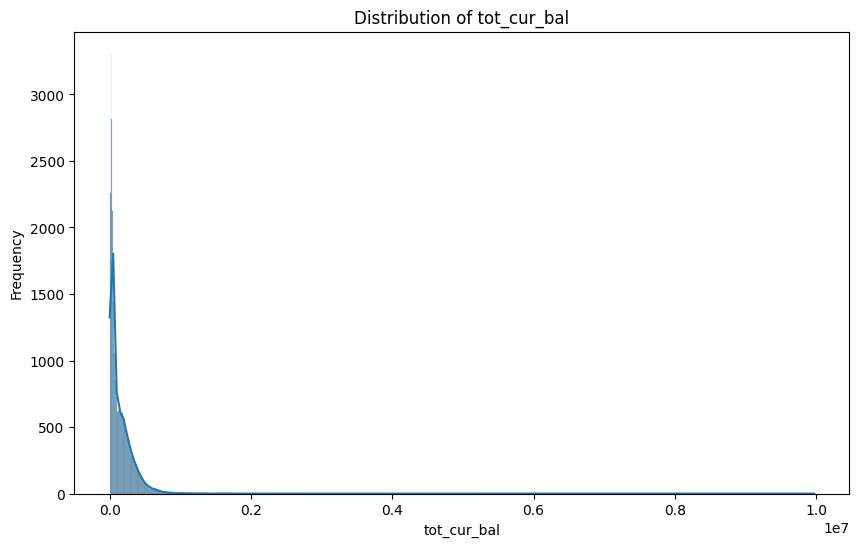

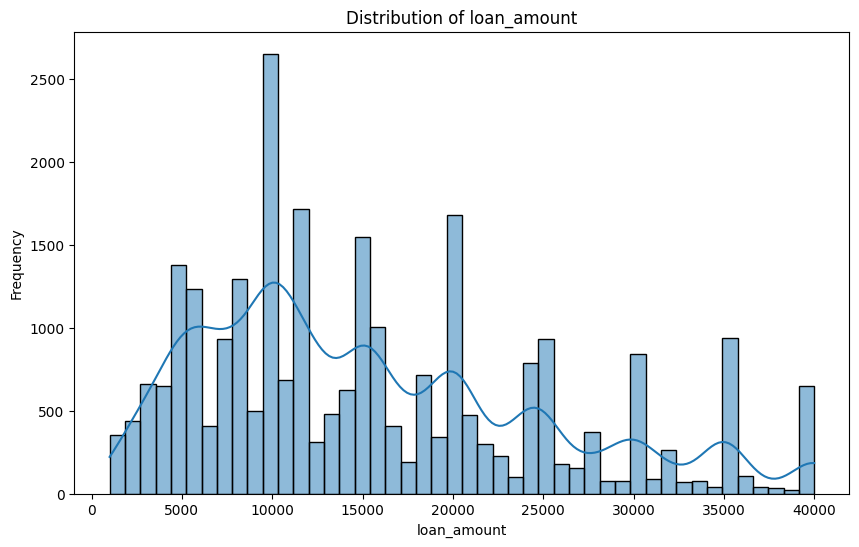

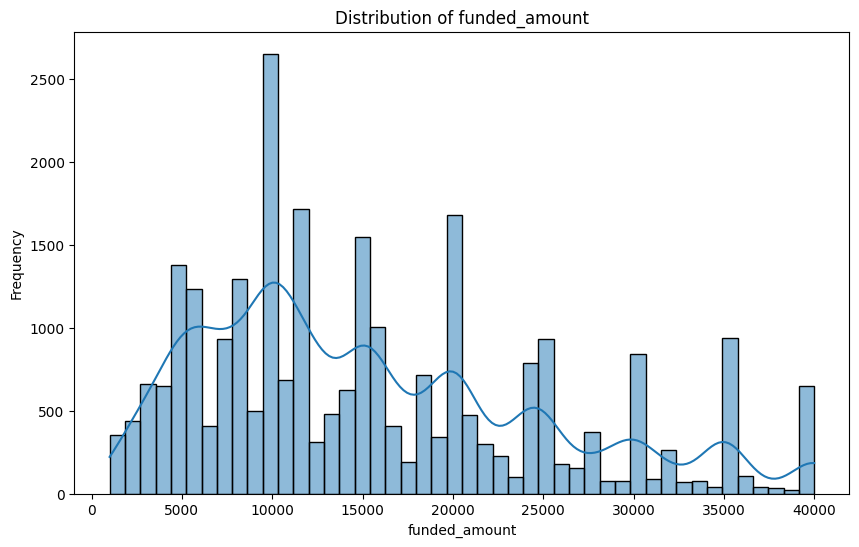

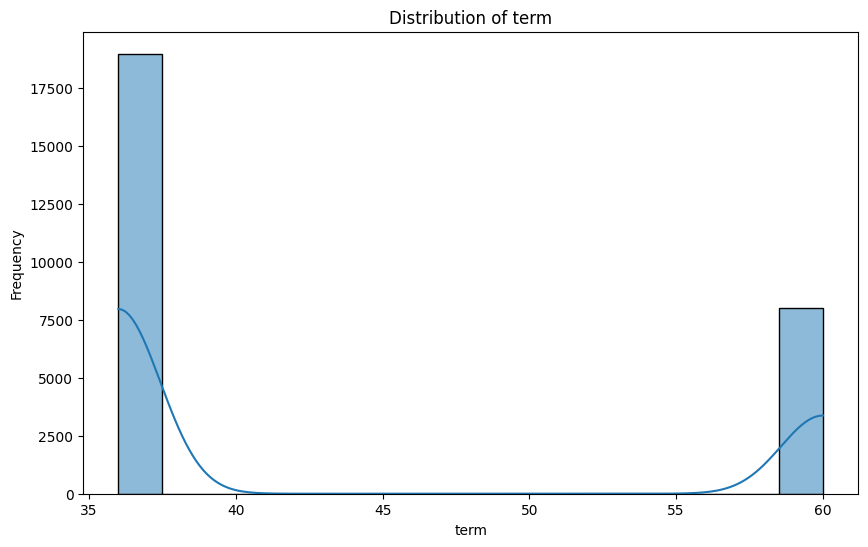

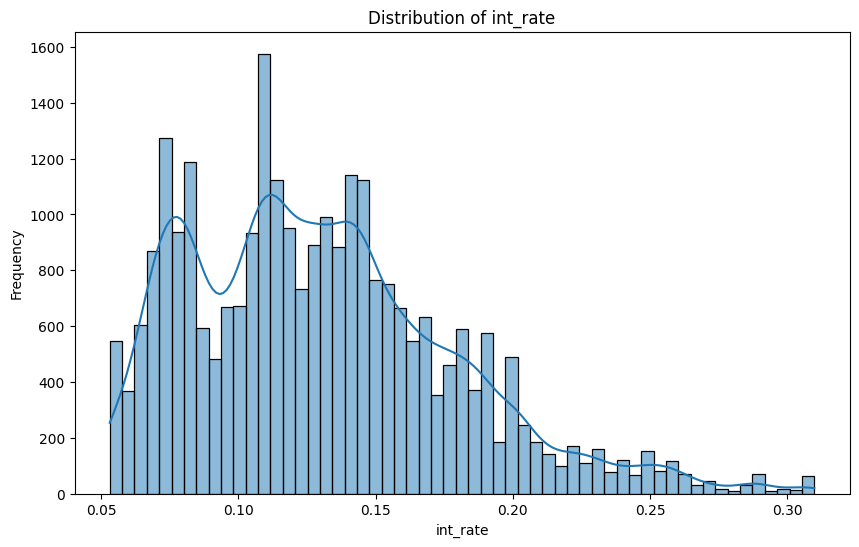

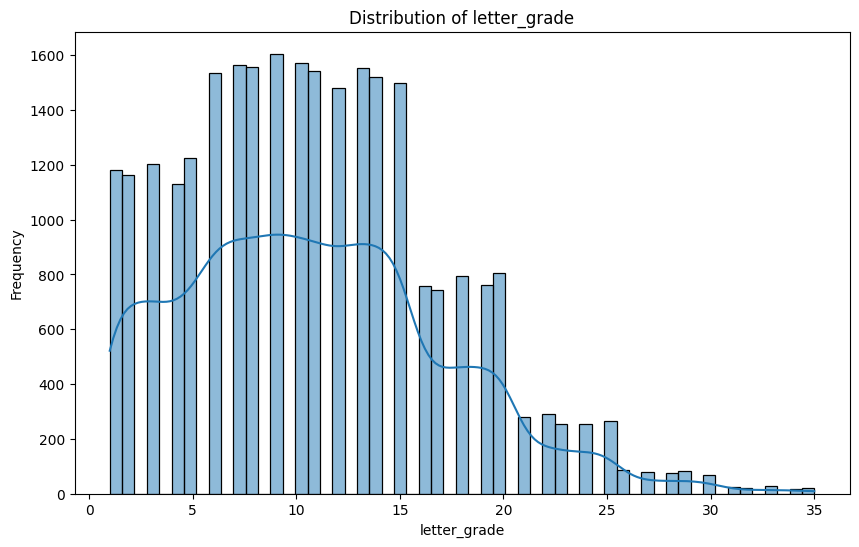

In [71]:
def plot_numerical_distributions(df): #checking the distribution of my data to better choose suitable outlier detection for each numerical data
    numerical_cols = df.select_dtypes(include=['number']).columns
    for col in numerical_cols:
        plt.figure(figsize=(10, 6))  # Adjust figure size as needed
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()


plot_numerical_distributions(cleaned_df)

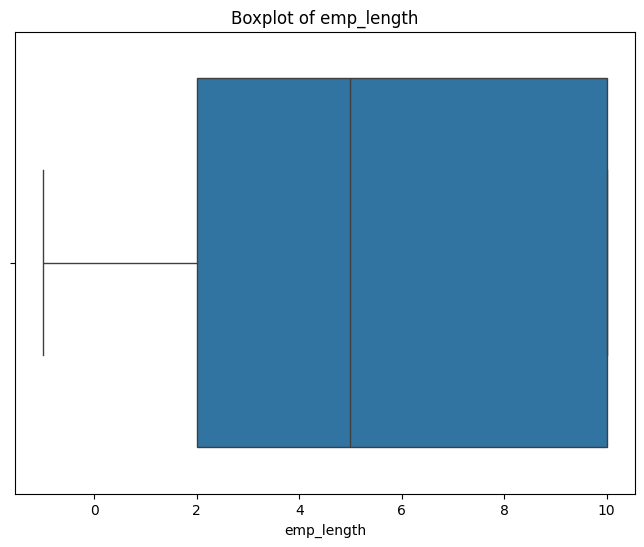

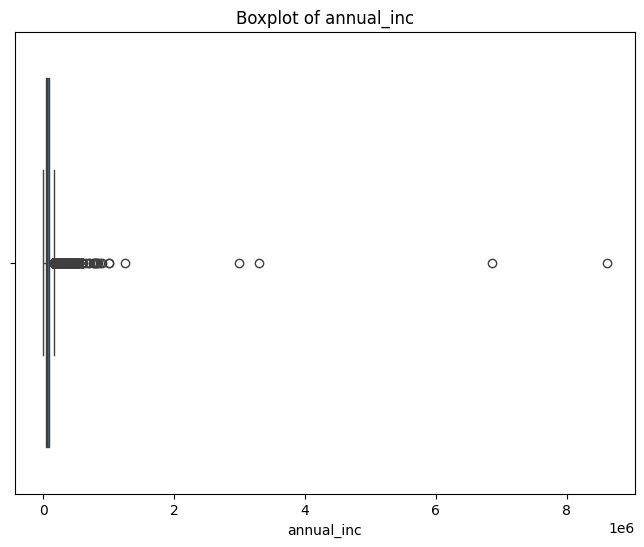

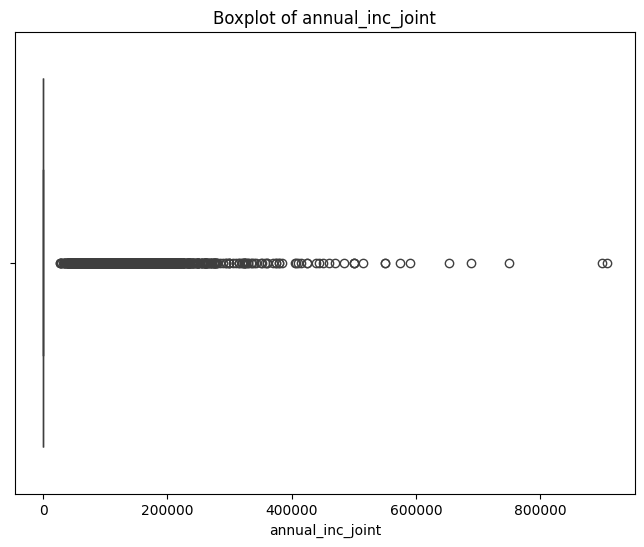

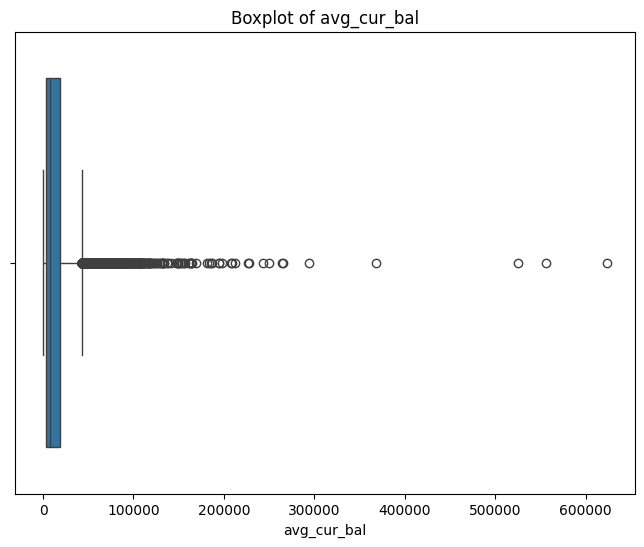

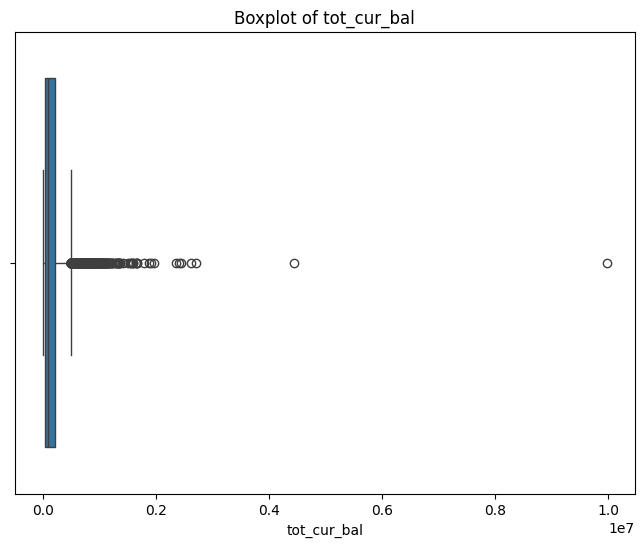

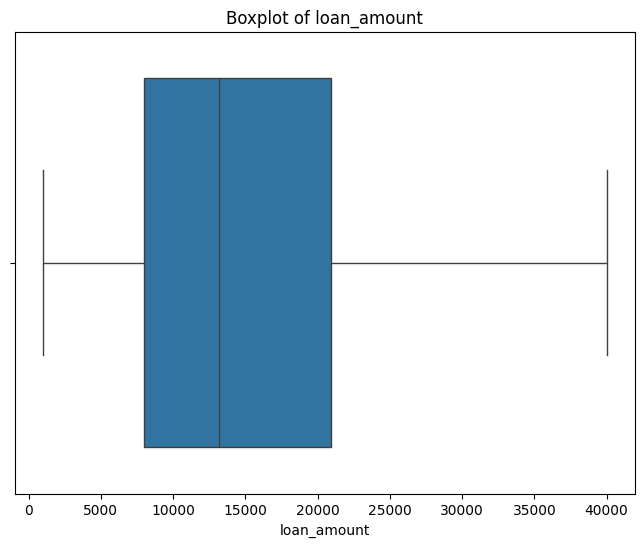

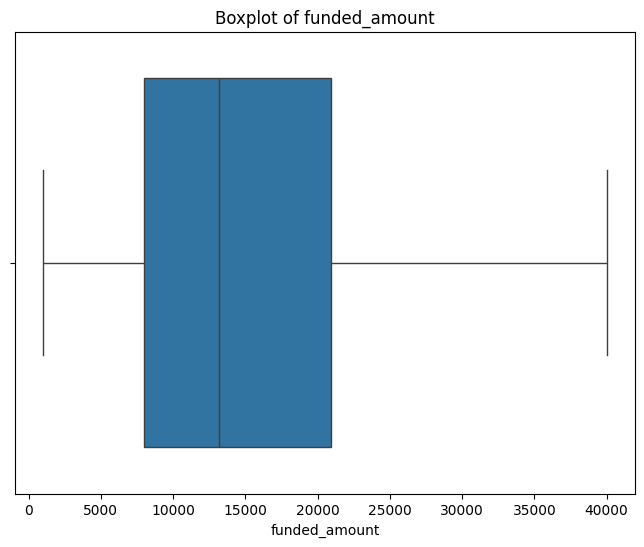

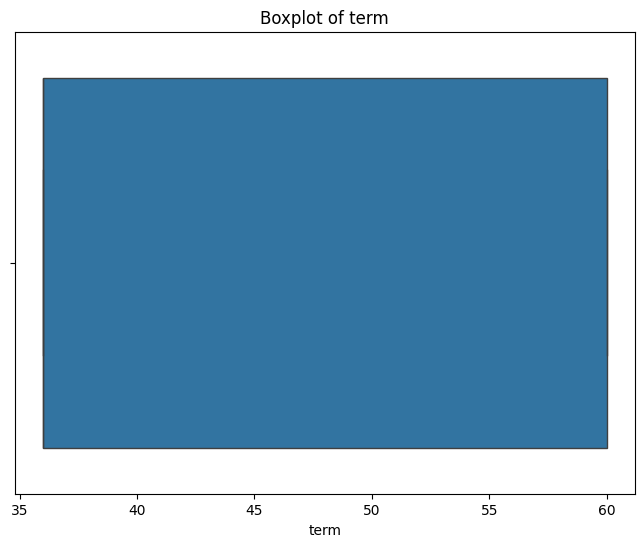

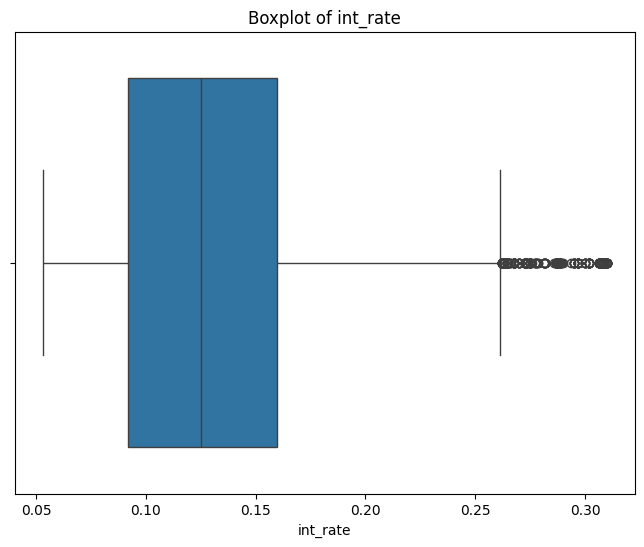

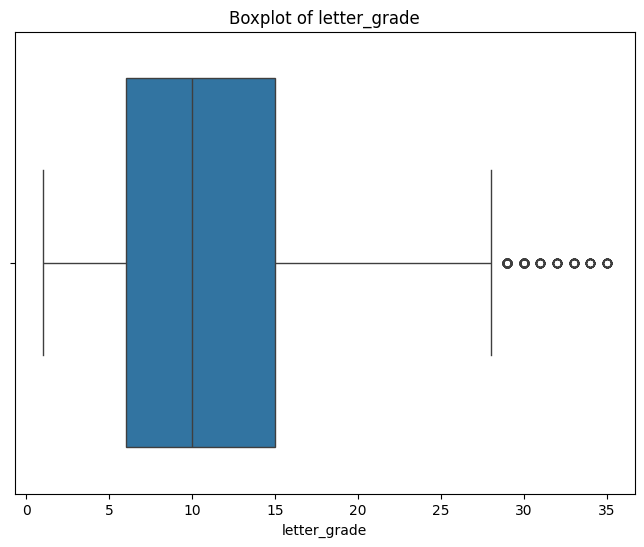

In [72]:
for col in cleaned_df.select_dtypes(include=['number']): #doing boxplot to check for outliers visually first
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=cleaned_df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

**Based on box plot results both loan amount, term, emp_length and funded amount which are continous normally distributed data has no outliers at all**

In [73]:
columns = ['annual_inc', 'avg_cur_bal', 'tot_cur_bal', 'int_rate', 'letter_grade'] #its chosen for detecting the skewed numerical variables as its most suitable for that and works well with low dimensional data

# Function to detect outliers using IQR
def detect_outliers_iqr(df, columns):
    outlier_indices = []  # List to store outlier indices

    # Loop through each column to detect outliers
    for col in columns:
        if df[col].dtype in ['int64', 'float64']:  # Only for numerical columns
            Q1 = df[col].quantile(0.25)  # 25th percentile
            Q3 = df[col].quantile(0.75)  # 75th percentile
            IQR = Q3 - Q1  # Interquartile range

            # Calculate outlier bounds
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Find outliers for the current column
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            outlier_indices.append(outliers.index)  # Store indices of outliers

    # Combine all outlier indices (union of all outliers)
    combined_outliers = list(set().union(*outlier_indices))  # Convert set to list

    # Return rows that are outliers in any column, drop duplicates
    return df.loc[combined_outliers].drop_duplicates()

# Apply the function to detect outliers
outliers = detect_outliers_iqr(cleaned_df, columns)

# Print the final outliers
print("Final outliers detected:")
print(outliers)


Final outliers detected:
                            emp_title  emp_length home_ownership  annual_inc  \
24577          District Sales Manager           7       MORTGAGE    175000.0   
24578  Sacramento Metro Fire District           8       MORTGAGE    100000.0   
1                                 NaN          -1       MORTGAGE    130000.0   
24580           Claim Section Manager          10           RENT    200000.0   
7                                 COO           4           RENT    500000.0   
...                               ...         ...            ...         ...   
16368        Director of Advertising            1           RENT    195000.0   
16369                Staffing Manager          10       MORTGAGE    140000.0   
16373         Psychological associate          10       MORTGAGE    185000.0   
24570              Director of Sales            4           RENT    170000.0   
24572                         Manager           9           RENT     57500.0   

       annual_

handling outliers:
for the skewd numerical data log transformation is chosen because it works well with positvely skewed data

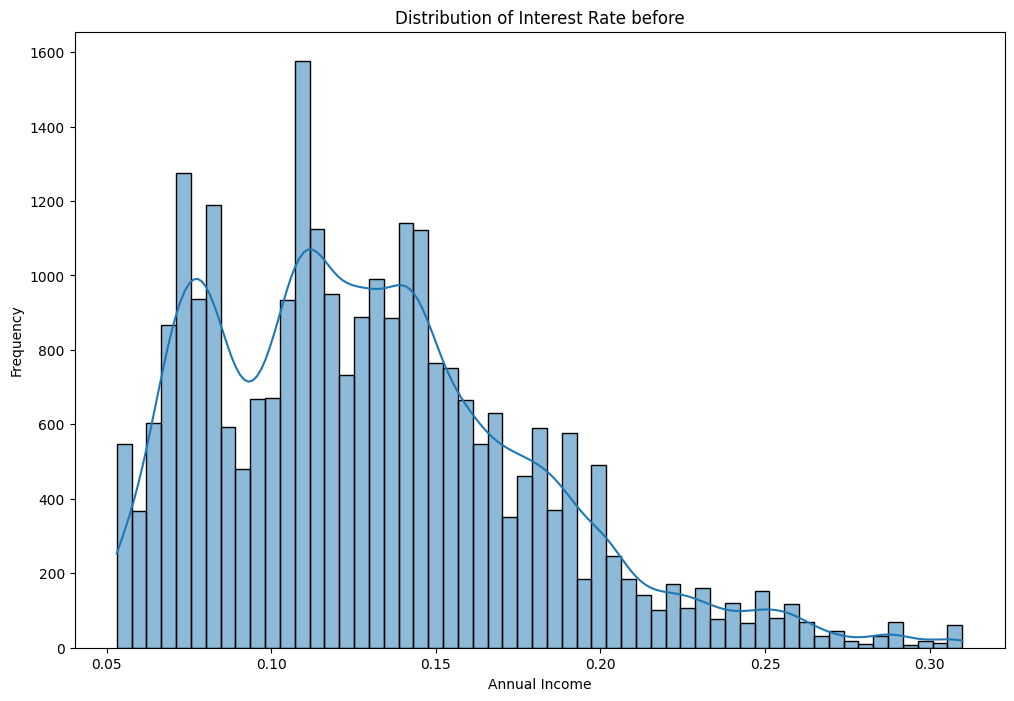

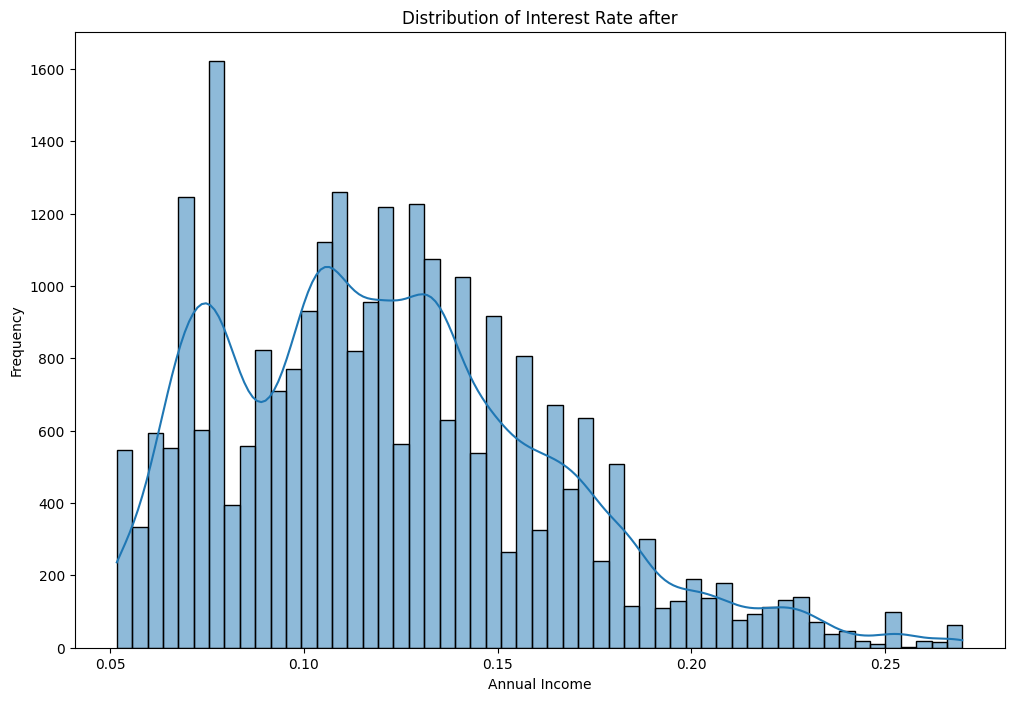

In [74]:
columns = ['annual_inc', 'avg_cur_bal', 'tot_cur_bal', 'int_rate', 'letter_grade']  # before and after log transformation shows its effect
# Function to handle outliers using log transformation and IQR method
df_no_outliers = cleaned_df.copy()
def handle_outliers_with_log(df, columns):

    # Apply log transformation to numerical columns (only for positive values)
    for col in columns:
        if df[col].dtype in ['int64', 'float64']:  # Only for numerical columns
            # Apply log transformation (adding a small constant to avoid log(0) issues)
            df_no_outliers[col] = np.log1p(df[col])
    return df_no_outliers

histplot('int_rate', cleaned_df, 'Distribution of Interest Rate before', 'Annual Income', 'Frequency') #example before
handle_outliers_with_log(df_no_outliers, columns)
histplot('int_rate', df_no_outliers, 'Distribution of Interest Rate after', 'Annual Income', 'Frequency') #after

##Data Transformation and Feature Engineering


In [75]:
df_no_outliers.head()

,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,...,state,funded_amount,term,int_rate,letter_grade,issue_date,pymnt_plan,type,purpose,description
0,Truck Driver,1,MORTGAGE,10.884835,-1.0,Verified,242xx,VA,10.017307,12.319834,...,VA,30000.0,60,0.197621,2.890372,18 July 2018,False,individual,debt_consolidation,Debt consolidation
1,NaN,-1,MORTGAGE,11.775297,-1.0,Verified,105xx,NY,10.422609,13.367009,...,NY,35000.0,36,0.108585,2.397895,16 May 2016,False,individual,debt_consolidation,Debt consolidation
2,Order processor,4,MORTGAGE,10.239996,-1.0,Not Verified,932xx,CA,7.457032,9.066239,...,CA,10050.0,36,0.156918,3.044522,14 October 2014,False,individual,credit_card,Credit card refinancing
3,Senior Auditor,3,MORTGAGE,11.350418,-1.0,Verified,750xx,TX,10.414633,12.611818,...,TX,21500.0,60,0.148592,2.484907,17 December 2017,False,individual,debt_consolidation,Debt consolidation
4,Director of Operations,3,MORTGAGE,11.884496,-1.0,Not Verified,430xx,OH,9.885374,12.593401,...,OH,4800.0,36,0.069619,1.609438,18 October 2018,False,individual,credit_card,Credit card refinancing


In [76]:
# Ensure the issue_date column is of datetime type
print(df_no_outliers.shape)
df_no_outliers['issue_date'] = pd.to_datetime(df_no_outliers['issue_date'])
# Create the month number column (1-12)
df_no_outliers['issue_month'] = df_no_outliers['issue_date'].dt.month
df_no_outliers['issue_year']= df_no_outliers['issue_date'].dt.year
df_no_outliers['issue_day']= df_no_outliers['issue_date'].dt.day
df_no_outliers.drop('issue_date', axis=1, inplace=True)
print(df_no_outliers.shape) #2 cols are removed

(27030, 22)
(27030, 24)


In [77]:
print(df_no_outliers[['annual_inc', 'funded_amount']].describe()) #i log transformed annual income so i need to do the added salary can cover col using the original df

         annual_inc  funded_amount
count  27030.000000   27030.000000
mean      11.117552   15483.328709
std        0.561085    9505.763009
min        5.303305    1000.000000
25%       10.757924    8000.000000
50%       11.097425   13200.000000
75%       11.461643   20950.000000
max       15.968310   40000.000000


In [78]:
print(df_no_outliers.shape)
df_no_outliers['salary_can_cover']= cleaned_df['annual_inc'] >= cleaned_df['funded_amount'] #the original data before handling outliers are cleaned_df
df_no_outliers['salary_can_cover'].value_counts()
print(df_no_outliers.shape) #added 1 column

(27030, 24)
(27030, 25)


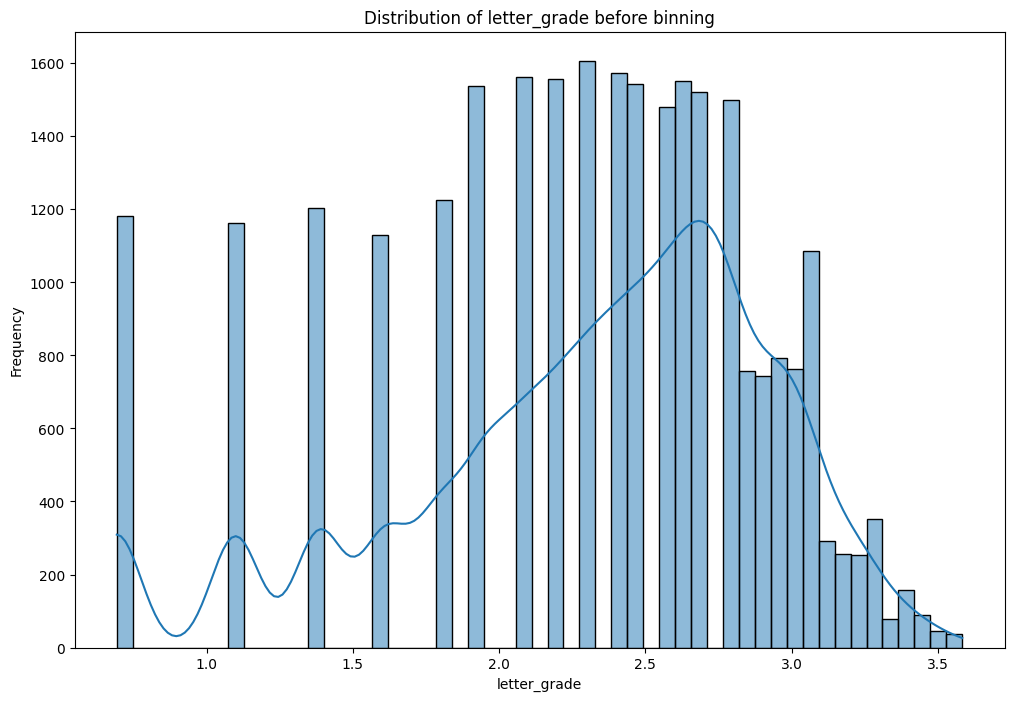

In [79]:
histplot(x='letter_grade', data=df_no_outliers, title='Distribution of letter_grade before binning', xlabel='letter_grade', ylabel='Frequency')

In [80]:
bins = [0, 5, 10, 15, 20, 25, 30, 35]
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

# Apply binning to the 'grade' column from cleaned_df
df_no_outliers['letter_grade'] = pd.cut(cleaned_df['letter_grade'], bins=bins, labels=labels, include_lowest=True) #applied it on cleaned_df because it is transformed while handling outliers
df_no_outliers.head()


,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,...,int_rate,letter_grade,pymnt_plan,type,purpose,description,issue_month,issue_year,issue_day,salary_can_cover
0,Truck Driver,1,MORTGAGE,10.884835,-1.0,Verified,242xx,VA,10.017307,12.319834,...,0.197621,D,False,individual,debt_consolidation,Debt consolidation,7,2018,18,True
1,NaN,-1,MORTGAGE,11.775297,-1.0,Verified,105xx,NY,10.422609,13.367009,...,0.108585,B,False,individual,debt_consolidation,Debt consolidation,5,2016,16,True
2,Order processor,4,MORTGAGE,10.239996,-1.0,Not Verified,932xx,CA,7.457032,9.066239,...,0.156918,D,False,individual,credit_card,Credit card refinancing,10,2014,14,True
3,Senior Auditor,3,MORTGAGE,11.350418,-1.0,Verified,750xx,TX,10.414633,12.611818,...,0.148592,C,False,individual,debt_consolidation,Debt consolidation,12,2017,17,True
4,Director of Operations,3,MORTGAGE,11.884496,-1.0,Not Verified,430xx,OH,9.885374,12.593401,...,0.069619,A,False,individual,credit_card,Credit card refinancing,10,2018,18,True


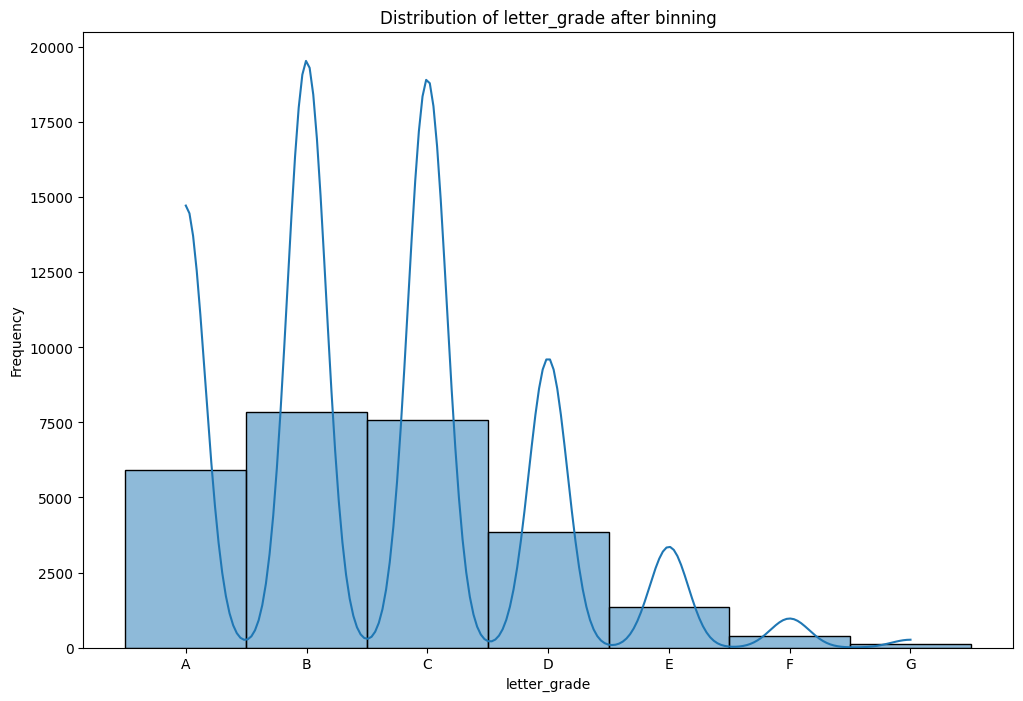

In [81]:
histplot(x='letter_grade', data=df_no_outliers, title='Distribution of letter_grade after binning', xlabel='letter_grade', ylabel='Frequency') #changed the distibution of dataset

In [82]:
cleaned_df.columns

Index(['emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'annual_inc_joint', 'verification_status', 'zip_code', 'addr_state',
       'avg_cur_bal', 'tot_cur_bal', 'loan_status', 'loan_amount', 'state',
       'funded_amount', 'term', 'int_rate', 'letter_grade', 'issue_date',
       'pymnt_plan', 'type', 'purpose', 'description'],
      dtype='object')

In [83]:
print(df_no_outliers.shape)
def calculate_installment(row):
    P = row['loan_amount']  # Loan principal
    r = row['int_rate'] / 12   # Monthly interest rate (annual interest rate divided by 12)
    n = row['term']  # Number of payments (loan term in months)

    if r == 0:  # If interest rate is 0, the formula simplifies to P / n
        return P / n

    # Monthly installment formula
    M = P * r * (1 + r)**n / ((1 + r)**n - 1)
    return M

# Apply the function to the DataFrame to create the new column
df_no_outliers['installment_per_month'] = df_no_outliers.apply(calculate_installment, axis=1)

df_no_outliers.head()
print(df_no_outliers.shape) #1 column is added

(27030, 25)
(27030, 26)


In [84]:
df_encoded= df_no_outliers.copy()
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27030 entries, 0 to 27029
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   emp_title              24710 non-null  object  
 1   emp_length             27030 non-null  int64   
 2   home_ownership         27030 non-null  object  
 3   annual_inc             27030 non-null  float64 
 4   annual_inc_joint       27030 non-null  float64 
 5   verification_status    27030 non-null  object  
 6   zip_code               27030 non-null  object  
 7   addr_state             27030 non-null  object  
 8   avg_cur_bal            27030 non-null  float64 
 9   tot_cur_bal            27030 non-null  float64 
 10  loan_status            27030 non-null  object  
 11  loan_amount            27030 non-null  float64 
 12  state                  27030 non-null  object  
 13  funded_amount          27030 non-null  float64 
 14  term                   27030 non-null 

In [85]:
from sklearn.preprocessing import LabelEncoder #choose this method for these cols as they have ranking importance and low values which is ordinal

def label_encode_columns(df, columns):
    label_encoder = LabelEncoder()
    for col in columns:
        df[col] = label_encoder.fit_transform(df[col])
    return df

# List of columns to label encode
columns_to_encode = ['verification_status', 'loan_status', 'letter_grade']

# Apply the function to your dataframe
df_encoded = label_encode_columns(df_encoded, columns_to_encode)

# Check the first few rows to verify
print(df_encoded[columns_to_encode].head())


   verification_status  loan_status  letter_grade
0                    2            1             3
1                    2            1             1
2                    0            0             3
3                    2            3             2
4                    0            1             0


In [86]:
def one_hot_encode(df, columns_to_encode): #chose this method because they are not ranked values, can have alot of unique values and not ordinal
    # Apply one-hot encoding to the specified columns
    df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

    return df_encoded

# List of columns to one-hot encode
columns_to_encode = ['emp_title', 'home_ownership', 'zip_code',
                     'addr_state', 'state', 'type', 'purpose', 'description']


df_encoded = one_hot_encode(df_encoded, columns_to_encode)

# Check the first few rows to verify
print(df_encoded.head())


   emp_length  annual_inc  annual_inc_joint  verification_status  avg_cur_bal  \
0           1   10.884835              -1.0                    2    10.017307   
1          -1   11.775297              -1.0                    2    10.422609   
2           4   10.239996              -1.0                    0     7.457032   
3           3   11.350418              -1.0                    2    10.414633   
4           3   11.884496              -1.0                    0     9.885374   

   tot_cur_bal  loan_status  loan_amount  funded_amount  term  ...  \
0    12.319834            1      30000.0        30000.0    60  ...   
1    13.367009            1      35000.0        35000.0    36  ...   
2     9.066239            0      10050.0        10050.0    36  ...   
3    12.611818            3      21500.0        21500.0    60  ...   
4    12.593401            1       4800.0         4800.0    36  ...   

   description_tires  description_unsecured  description_unsecured dept  \
0              Fa

In [87]:
df_encoded.head()

,emp_length,annual_inc,annual_inc_joint,verification_status,avg_cur_bal,tot_cur_bal,loan_status,loan_amount,funded_amount,term,...,description_tires,description_unsecured,description_unsecured dept,description_upstairs kitchen remodel,description_used car loan,description_vacation,description_want to pay credit cards debt,description_wedding,description_wedding loan,description_wedding- celebrating life
0,1,10.884835,-1.0,2,10.017307,12.319834,1,30000.0,30000.0,60,...,False,False,False,False,False,False,False,False,False,False
1,-1,11.775297,-1.0,2,10.422609,13.367009,1,35000.0,35000.0,36,...,False,False,False,False,False,False,False,False,False,False
2,4,10.239996,-1.0,0,7.457032,9.066239,0,10050.0,10050.0,36,...,False,False,False,False,False,False,False,False,False,False
3,3,11.350418,-1.0,2,10.414633,12.611818,3,21500.0,21500.0,60,...,False,False,False,False,False,False,False,False,False,False
4,3,11.884496,-1.0,0,9.885374,12.593401,1,4800.0,4800.0,36,...,False,False,False,False,False,False,False,False,False,False


**I have already applied log transformation to the skewed numerical variables and performed encoding for the categorical variables. The remaining task is to normalize the numerical variables that follow a normal distribution**

In [88]:
from sklearn.preprocessing import StandardScaler

columns_to_standardize = ['loan_amount', 'term', 'emp_length', 'funded_amount'] #I chose standardization because these columns are normally distributed and do not contain outliers, making it unnecessary to use Min-Max scaling

scaler = StandardScaler()

df_encoded[columns_to_standardize] = scaler.fit_transform(df_encoded[columns_to_standardize])

# Display the first few rows of the standardized data
print(df_encoded[columns_to_standardize].head())

   loan_amount      term  emp_length  funded_amount
0     1.527172  1.537133   -1.157878       1.527172
1     2.053179 -0.650562   -1.670837       2.053179
2    -0.571593 -0.650562   -0.388439      -0.571593
3     0.632962  1.537133   -0.644919       0.632962
4    -1.123900 -0.650562   -0.644919      -1.123900


##Lookup Table(s)


In [89]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def create_lookup_table(df, cleaned_df, df_encoded):
    lookup = pd.DataFrame(columns=['Column', 'Original', 'Imputed/Encoded'])

    imputed_columns = [ 'annual_inc_joint', 'emp_title','term','emp_length']

    for col in imputed_columns:
        original_values = df[col]
        imputed_values = cleaned_df[col]

        # Use numpy.isclose for floating-point comparisons
        if pd.api.types.is_float_dtype(original_values):
            changed_indices = ~np.isclose(original_values, imputed_values, atol=1e-8)
        else:
            changed_indices = original_values != imputed_values

        if changed_indices.any():  # Only proceed if there are any changes
            print(f"Processing column: {col}, Changed Rows: {changed_indices.sum()}")
            mapping_df = pd.DataFrame({
                'Column': [col] * changed_indices.sum(),
                'Original': original_values[changed_indices],
                'Imputed/Encoded': imputed_values[changed_indices]
            })
            lookup = pd.concat([lookup, mapping_df], ignore_index=True)
        else:
            print(f"No changes found for column: {col}")

    # Columns for label encoding
    encoded_columns = ['verification_status', 'loan_status', 'letter_grade']

    for col in encoded_columns:
        original_values = df[col]
        encoded_values = df_encoded[col]

        mapping_df = pd.DataFrame({
            'Column': [col] * len(original_values),
            'Original': original_values,
            'Imputed/Encoded': encoded_values
        })
        lookup = pd.concat([lookup, mapping_df], ignore_index=True)

    # Save the lookup table as a CSV
    lookup.to_csv('lookup_table.csv', index=False)

    return lookup

# Usage example:
lookup_df = create_lookup_table(df, cleaned_df, df_encoded)
lookup_df


Processing column: annual_inc_joint, Changed Rows: 25139
Processing column: emp_title, Changed Rows: 2320
Processing column: term, Changed Rows: 27030
Processing column: emp_length, Changed Rows: 27030


<ipython-input-89-731791c4204c>:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lookup = pd.concat([lookup, mapping_df], ignore_index=True)


,Column,Original,Imputed/Encoded
0,annual_inc_joint,NaN,-1.0
1,annual_inc_joint,NaN,-1.0
2,annual_inc_joint,NaN,-1.0
3,annual_inc_joint,NaN,-1.0
4,annual_inc_joint,NaN,-1.0
...,...,...,...
162604,letter_grade,4,0.0
162605,letter_grade,30,5.0
162606,letter_grade,1,0.0
162607,letter_grade,16,3.0


In [90]:
lookup_df['Column'].value_counts()

,count
Column,
term,27030
emp_length,27030
verification_status,27030
loan_status,27030
letter_grade,27030
annual_inc_joint,25139
emp_title,2320


##Bonus part

In [91]:
from bs4 import BeautifulSoup
import requests

In [92]:
url="https://www23.statcan.gc.ca/imdb/p3VD.pl?Function=getVD&TVD=53971"

In [93]:
page= requests.get(url)

In [94]:
soup= BeautifulSoup(page.text, 'html.parser')

In [95]:
table= soup.find('table')

In [96]:
world_titles= table.find_all('th')

In [97]:
world_table_titles = [title.text.strip() for title in world_titles]
world_table_titles

['Code',
 'State',
 'Abbreviation',
 'Alpha code',
 '01',
 '02',
 '04',
 '05',
 '06',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '53',
 '54',
 '55',
 '56']

In [98]:
world_table_titles_cleaned = world_table_titles[1:4]

world_table_titles_cleaned


['State', 'Abbreviation', 'Alpha code']

In [99]:
df_states= pd.DataFrame(columns=world_table_titles_cleaned)
df_states

,State,Abbreviation,Alpha code


In [100]:
column_data= table.find_all('tr')

In [101]:
for row in column_data[1:]:
    row_data= row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    length= len(df_states)
    df_states.loc[length]= individual_row_data

In [102]:
# Create a dictionary for mapping 'Alpha code' to 'State' from the `df` table
state_mapping = dict(zip(df_states['Alpha code'], df_states['State']))

# Add the 'state_name' column to `df_encoded` by mapping the 'state' column
cleaned_df['state_name'] = cleaned_df['state'].map(state_mapping)

# Verify the changes
print(cleaned_df[['state_name','state']])



        state_name state
0         Virginia    VA
1         New York    NY
2       California    CA
3            Texas    TX
4             Ohio    OH
...            ...   ...
27025         Ohio    OH
27026         Ohio    OH
27027  Connecticut    CT
27028         Ohio    OH
27029     New York    NY

[27030 rows x 2 columns]


In [103]:
df_encoded['state_name']= cleaned_df['state_name']
df_encoded

,emp_length,annual_inc,annual_inc_joint,verification_status,avg_cur_bal,tot_cur_bal,loan_status,loan_amount,funded_amount,term,...,description_unsecured,description_unsecured dept,description_upstairs kitchen remodel,description_used car loan,description_vacation,description_want to pay credit cards debt,description_wedding,description_wedding loan,description_wedding- celebrating life,state_name
0,-1.157878,10.884835,-1.0,2,10.017307,12.319834,1,1.527172,1.527172,1.537133,...,False,False,False,False,False,False,False,False,False,Virginia
1,-1.670837,11.775297,-1.0,2,10.422609,13.367009,1,2.053179,2.053179,-0.650562,...,False,False,False,False,False,False,False,False,False,New York
2,-0.388439,10.239996,-1.0,0,7.457032,9.066239,0,-0.571593,-0.571593,-0.650562,...,False,False,False,False,False,False,False,False,False,California
3,-0.644919,11.350418,-1.0,2,10.414633,12.611818,3,0.632962,0.632962,1.537133,...,False,False,False,False,False,False,False,False,False,Texas
4,-0.644919,11.884496,-1.0,0,9.885374,12.593401,1,-1.123900,-1.123900,-0.650562,...,False,False,False,False,False,False,False,False,False,Ohio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27025,-0.388439,10.621352,-1.0,0,9.987323,11.933200,1,-0.829336,-0.829336,-0.650562,...,False,False,False,False,False,False,False,False,False,Ohio
27026,-0.901398,10.571343,-1.0,0,9.325542,12.215845,0,-0.316480,-0.316480,1.537133,...,False,False,False,False,False,False,False,False,False,Ohio
27027,-0.901398,11.225257,-1.0,0,9.709599,12.348592,1,0.895965,0.895965,-0.650562,...,False,False,False,False,False,False,False,False,False,Connecticut
27028,0.124520,10.341775,-1.0,0,8.136226,9.927790,3,-0.874047,-0.874047,-0.650562,...,False,False,False,False,False,False,False,False,False,Ohio


##Saving the Output Dataset


In [104]:
import os

# Define the folder in Google Drive where the file will be saved
folder_path = "/content/drive/MyDrive"  # Adjust the path as needed

ID = "52-1830"

# Before saving lookup_df, convert 'Original' column to string
lookup_df['Original'] = lookup_df['Original'].astype(str)

# Convert 'Imputed/Encoded' column to string to ensure consistent data type
lookup_df['Imputed/Encoded'] = lookup_df['Imputed/Encoded'].astype(str)

# Save the Parquet files to Google Drive
df_encoded.to_parquet(f"{folder_path}/fintech_data_{ID}_clean.parquet", index=False)
lookup_df.to_parquet(f"{folder_path}/fintech_lookup_{ID}.parquet", index=False)

print("Parquet files saved successfully in Google Drive!")

Parquet files saved successfully in Google Drive!
